## Drug-target interactions: Predicting pEC50 for molecules binding to dopamine receptors

#### This is a full-fledged machine learning project to predict the drug-target binding characteristics of small molecules that are interacting with different dopamine receptors. 

#### Considering all dopamine receptor types (D1, D2, D3, D4 and D5), our desired dataset is first generated which contains agonist molecules and their EC50 values (or pEC50) with respect to these receptors. Then, the project proceeds to perform machine learning analysis for pEC50 prediction.

### Let's begin with our EDA and Machine learning!!

### Since our dataset was created already in the `creating_dataset.ipynb` workspace, the final dataset with the enriched parameters is ready and we can start with our EDA and machine learning now.
### There are no missing values, no duplicates and the data is all set. 

## 1. Problem definition 
#### Given the molecular descriptors of the small inhibitor molecules, interacting with different dopamine receptors, can we predict their potency (in terms of pEC50)? 

We should be trying to aim for a resultant value of pEC50 with the MAE of ~0.2-0.3 since these values are pretty sensitive.

## 2 . About the Data:

* For all 5 different types of dopamine receptors: D1 to D5, a dataset was constructed consisting of small molecules that interact with these receptors and their respective EC50 values. The following information was extracted from ChEMBL:
    * ChEMBL ID of the molecule
    * SMILES string
    * target information
    * EC50 values (nM units)
* For a more convinent study in practical terms, **pEC50** was determined from EC50 values. 
* Later, the dataset was enriched with the molecular descriptors of these small molecules using the SMILES information:
   * MW
   * LogP
   * Number of H donors and acceptors
   * Topological Polar Surface Area (TPSA)
   * Ring count: Number of rings in the molecule.
   * Rotatable bonds: Number of bonds that can freely rotate.
* Finally, the ChEMBL IDs, SMILES strings and EC50 features were removed from the dataset afterwards. 


The data dictionary, now, is as follows: 

| S. No. | Feature | Numerical/Categorical | Description | Units (if any) or any additional information | 
| --- | --- | --- | --- | --- | 
| 1. | Assay Type | C | B (binding), F (functional), A (ADME) | B: how a compound binds to a molecular target; F: measures the biological effect/activity of a compound; A: Absorption, Distribution, Metabolism, and Excretion of a drug. A critical part of drug discovery and development because they help ensure that a drug is safe and effective. | 
| 2. | Target Name | C | The type of dopamine receptor that the molecule targets. | Dopamine D1/D2/D3/D4/D5 receptor |
| 3. | pEC50 | N | - log10(EC50) value | Another way EC50 values can be presented | 
| 4. | MW | N | Molecular weight | g/mol |
| 5. | LogP | N | Water-octanol partition coefficient |  |
| 6. | H_Donors | N | Number of Hydrogen bond donors |  |
| 7. | H_Acceptors | N | Number of Hydrogen bonds acceptors |  |
| 8. | TPSA | N | Topological Polar Surface Area: A metric used to predict how well a drug can permeate cells and reach its target sites in the body. TPSA value increases as the number of polar groups (containing N and O) within the drug structure increases. TPSA <= 140 Å2 or less is considered good for oral bioavailability (for its target). | Ångströms squared (Å^2) |
| 9. | Ring count | N | Number of rings in the molecule |  |
| 10. | Rotatable bonds | N | Number of bonds that can freely rotate |  |


In [1]:
# necessary imports 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
import requests 

%matplotlib inline 

In [ ]:
df = pd.read_csv('dopamine_pEC50.csv')
df.head()

Assay Type           Target Name     pEC50       MW    LogP  H_Donors  \
0          F  Dopamine D1 receptor  6.625252  315.369  2.2902       3.0   
1          F  Dopamine D1 receptor  6.847712  223.272  1.4489       3.0   
2          F  Dopamine D1 receptor  7.866461  279.380  3.0093       3.0   
3          F  Dopamine D1 receptor  7.903090  315.413  2.8833       3.0   
4          F  Dopamine D1 receptor  7.463442  285.343  2.2816       3.0   

   H_Acceptors   TPSA  Ring_Count  Rotatable_Bonds  
0          5.0  84.94         3.0              4.0  
1          4.0  75.71         2.0              2.0  
2          4.0  75.71         2.0              6.0  
3          4.0  61.72         3.0              4.0  
4          4.0  75.71         3.0              3.0

In [ ]:
df['Assay Type'].value_counts()

Assay Type
F    2168
B     822
A     135
Name: count, dtype: int64

In [ ]:
# better to rename Target Name column values to shorter names. 

df['Target Name'] = df['Target Name'].replace({'Dopamine D1 receptor':'D1','Dopamine D2 receptor':'D2',
                                              'Dopamine D3 receptor':'D3','Dopamine D4 receptor':'D4', 'Dopamine D5 receptor':'D5'})
df.head()

Assay Type Target Name     pEC50       MW    LogP  H_Donors  H_Acceptors  \
0          F          D1  6.625252  315.369  2.2902       3.0          5.0   
1          F          D1  6.847712  223.272  1.4489       3.0          4.0   
2          F          D1  7.866461  279.380  3.0093       3.0          4.0   
3          F          D1  7.903090  315.413  2.8833       3.0          4.0   
4          F          D1  7.463442  285.343  2.2816       3.0          4.0   

    TPSA  Ring_Count  Rotatable_Bonds  
0  84.94         3.0              4.0  
1  75.71         2.0              2.0  
2  75.71         2.0              6.0  
3  61.72         3.0              4.0  
4  75.71         3.0              3.0

### The above reflects the final dataset that we will be working with. Let us start with the

## 3. Exploratory Data Analysis (EDA)

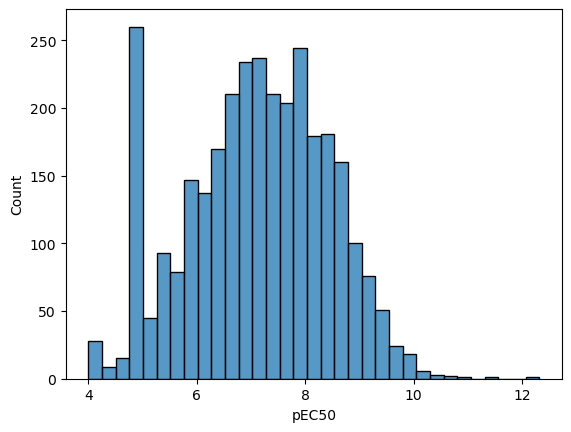

In [ ]:
# histogram of pEC50 values 
sns.histplot(data=df,x='pEC50')
plt.show()

Apparantly, there are a lot of pEC50 values near about the value 5. It seems unsual. Should we keep them or not? Let's zoom into the histogram a little.

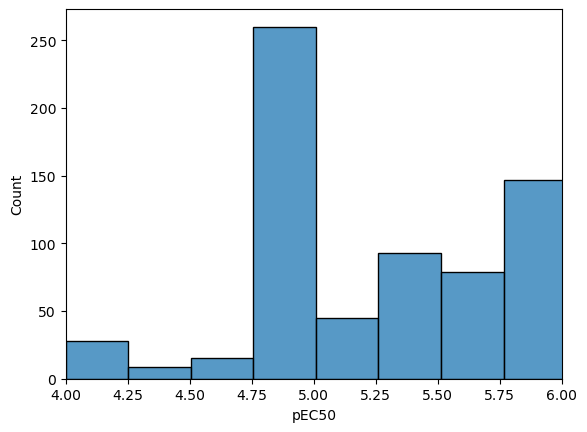

In [ ]:
sns.histplot(data=df,x='pEC50')
plt.xlim(4,6)
plt.show()

In [ ]:
df[(df['pEC50']>=4.50) & (df['pEC50']<=5.25)].T

11        55       68        85      108     109   \
Assay Type              F         F        F         F       F       F   
Target Name            D1        D1       D1        D1      D1      D1   
pEC50            5.066513  5.066665      5.0  4.796695     5.0     5.0   
MW                271.316   271.316  211.334   325.364  295.81  295.81   
LogP               2.4116    2.4116   1.5822     2.785   2.392   2.392   
H_Donors              3.0       3.0      2.0       1.0     1.0     1.0   
H_Acceptors           4.0       4.0      4.0       5.0     3.0     3.0   
TPSA                75.71     75.71    50.94     51.16    32.7    32.7   
Ring_Count            3.0       3.0      2.0       5.0     4.0     4.0   
Rotatable_Bonds       2.0       2.0      3.0       1.0     2.0     2.0   

                    113      115       120      158   ...     2948      3053  \
Assay Type             F        F         F        B  ...        F         B   
Target Name           D1       D1        D1       D1  ...       D4        D4   
pEC50                5.0      5.0  4.522879      5.0  ...      5.0  5.035646   
MW               255.745  298.224  1721.165  351.402  ...  430.552   359.473   
LogP              1.6118   2.7791   3.07117   3.2893  ...  4.35962   3.90892   
H_Donors             1.0      1.0      21.0      0.0  ...      1.0       1.0   
H_Acceptors          3.0      2.0      19.0      5.0  ...      6.0       3.0   
TPSA                32.7    23.47    562.34    55.84  ...    61.19     35.58   
Ring_Count           3.0      3.0       5.0      4.0  ...      4.0       4.0   
Rotatable_Bonds      0.0      0.0      55.0      2.0  ...      8.0       4.0   

                    3072     3073      3087      3088      3090     3091  \
Assay Type             B        B         B         B         B        F   
Target Name           D4       D4        D4        D4        D4       D5   
pEC50               5.18      5.0  5.229148  4.966576  4.772885      5.0   
MW               388.303  339.468   334.445   345.468    658.92  450.406   
LogP               1.956    3.002   2.10442    2.9863    8.6922   4.7462   
H_Donors             4.0      1.0       1.0       0.0       2.0      2.0   
H_Acceptors          3.0      5.0       6.0       6.0       6.0      3.0   
TPSA              121.08    48.05     70.58     47.36     96.36    60.77   
Ring_Count           2.0      4.0       3.0       3.0       3.0      3.0   
Rotatable_Bonds      6.0      4.0       4.0       6.0      11.0      6.0   

                    3123     3124  
Assay Type             B        B  
Target Name           D5       D5  
pEC50               4.95     4.62  
MW               561.465  388.303  
LogP              2.1336    1.956  
H_Donors             6.0      4.0  
H_Acceptors          7.0      3.0  
TPSA              205.91   121.08  
Ring_Count           2.0      2.0  
Rotatable_Bonds      6.0      6.0  

[10 rows x 317 columns]

Apparantly, there are a lot of pEC50 values = 5.0 exactly! This also indicates that a same amount of EC50 concentration was sufficient for all of these compounds which seems odd. Maybe this quantity is some kind of a threshold? Let us check how many of these entries hai pEC50 = 5.0 exactly. 

In [ ]:
df[df['pEC50']==5.0]

Assay Type Target Name  pEC50       MW     LogP  H_Donors  H_Acceptors  \
68            F          D1    5.0  211.334  1.58220       2.0          4.0   
108           F          D1    5.0  295.810  2.39200       1.0          3.0   
109           F          D1    5.0  295.810  2.39200       1.0          3.0   
113           F          D1    5.0  255.745  1.61180       1.0          3.0   
115           F          D1    5.0  298.224  2.77910       1.0          2.0   
...         ...         ...    ...      ...      ...       ...          ...   
2872          F          D4    5.0  357.885  4.35520       0.0          4.0   
2917          F          D4    5.0  367.493  3.64810       0.0          5.0   
2948          F          D4    5.0  430.552  4.35962       1.0          6.0   
3073          B          D4    5.0  339.468  3.00200       1.0          5.0   
3091          F          D5    5.0  450.406  4.74620       2.0          3.0   

       TPSA  Ring_Count  Rotatable_Bonds  
68    50.94         2.0              3.0  
108   32.70         4.0              2.0  
109   32.70         4.0              2.0  
113   32.70         3.0              0.0  
115   23.47         3.0              0.0  
...     ...         ...              ...  
2872  37.72         3.0              6.0  
2917  37.30         3.0              8.0  
2948  61.19         4.0              8.0  
3073  48.05         4.0              4.0  
3091  60.77         3.0              6.0  

[240 rows x 10 columns]

In [ ]:
print(len(df[df['pEC50']==4.0]))
df[df['pEC50']==4.0]

25


Assay Type Target Name  pEC50       MW     LogP  H_Donors  H_Acceptors  \
83            F          D1    4.0  363.841  3.19230       2.0          5.0   
673           F          D2    4.0  219.284  1.95150       1.0          3.0   
929           F          D2    4.0  573.536  2.24420       3.0         11.0   
930           F          D2    4.0  445.487  1.22080       2.0         10.0   
931           F          D2    4.0  373.375  1.65230       3.0          4.0   
932           F          D2    4.0  245.326  0.62890       2.0          3.0   
933           F          D2    4.0  359.470  2.66650       1.0          4.0   
934           F          D2    4.0  345.443  2.27640       1.0          4.0   
935           F          D2    4.0  459.514  1.97510       3.0         10.0   
936           F          D2    4.0  259.353  1.14680       2.0          3.0   
937           F          D2    4.0  359.470  2.71280       2.0          4.0   
941           F          D2    4.0  418.461  2.31520       2.0          9.0   
943           F          D2    4.0  535.956  2.48340       2.0         14.0   
944           F          D2    4.0  634.782  5.36530       3.0         12.0   
952           F          D2    4.0  337.343  1.72170       3.0          9.0   
1736          A          D2    4.0  370.449  2.54060       0.0          5.0   
1742          A          D2    4.0  379.460  3.01330       1.0          4.0   
1759          A          D2    4.0  380.448  2.40830       1.0          5.0   
1760          A          D2    4.0  406.504  2.08910       0.0          6.0   
1792          A          D2    4.0  433.430  3.90330       1.0          4.0   
2057          B          D2    4.0  414.477  3.95740       3.0          4.0   
2058          B          D2    4.0  325.368  1.14840       2.0          4.0   
2059          B          D2    4.0  511.626  5.60034       1.0          8.0   
2507          B          D3    4.0  309.413  3.20812       1.0          3.0   
2605          B          D3    4.0  393.487  3.40340       1.0          4.0   

        TPSA  Ring_Count  Rotatable_Bonds  
83     62.16         4.0              2.0  
673    32.70         2.0              3.0  
929   168.01         6.0              5.0  
930   130.71         6.0              5.0  
931    81.67         3.0              3.0  
932    44.37         3.0              3.0  
933    61.88         3.0              3.0  
934    61.88         3.0              3.0  
935   139.50         6.0              6.0  
936    58.36         3.0              3.0  
937    70.67         3.0              4.0  
941   127.47         5.0              7.0  
943   167.53         6.0              8.0  
944   171.79         4.0             22.0  
952   127.39         4.0              5.0  
1736   51.24         3.0              7.0  
1742   57.80         4.0              6.0  
1759   70.69         4.0              6.0  
1760   68.31         3.0              8.0  
1792   57.80         4.0              6.0  
2057   87.66         3.0              6.0  
2058   80.20         3.0              5.0  
2059   87.23         6.0              8.0  
2507   45.23         3.0              4.0  
2605   57.80         4.0              7.0

There are exactly 240 isntances that have pEC50 = 5.0, which is odd. Also, I checked how many instances have pEC50 = 4.0 exactly which were 25.

And as expected, it is acting as threshold value for experiments. For instance, I checked the data for 'CHEMBL301265' on [BindingDB](https://www.bindingdb.org/rwd/bind/chemsearch/marvin/MolStructure.jsp?monomerid=50116766&energyterm=kcal/mole&sort=yes&column=EC50) from our previously generated dataframe and found that in one of the experiments the "EC50: >1.00E+4nM" has been reported. This essentially means that pEC50=5.0 and this is not even a correct estimate since we are dealing with an inequality. 

A similar observation was made for the particular entry 'CHEMBL1950492' on [BindingDB](https://www.bindingdb.org/rwd/bind/chemsearch/marvin/MolStructure.jsp?monomerid=50364956&energyterm=kcal/mole&sort=yes&column=EC50) where again, it is mentioned that "EC50: >1.00E+5nM" which is an inequality and not an accurate value of the concentration.


Thus, judging by the following factors:
1. We have about 240 (and 25) instances reporting the same pEC50 = 5.0 (and 4.0) exactly, which does not seem like an ideal scenario. 
2. BindingDB suggests that this value results from experiments reporting EC50 > 10^4 (and 10^5) nM which is not an exact value, but merely an estimate.
3. This value of pEC50 falls in the lower ranges of the histogram and is not falling around the mean of the data. (Its value is not a generally expected value for dopamine receptors.)
4. We have a large dataset regardless.

I think, it is safe to not consider these values for our analysis and ML modelling.

In [ ]:
df_updated = df[(df['pEC50']!=5.0) & (df['pEC50']!=4.0)]
df_updated = df_updated.reset_index().drop('index',axis=1)
df_updated

Assay Type Target Name     pEC50       MW     LogP  H_Donors  \
0             F          D1  6.625252  315.369  2.29020       3.0   
1             F          D1  6.847712  223.272  1.44890       3.0   
2             F          D1  7.866461  279.380  3.00930       3.0   
3             F          D1  7.903090  315.413  2.88330       3.0   
4             F          D1  7.463442  285.343  2.28160       3.0   
...         ...         ...       ...      ...      ...       ...   
2855          B          D5  7.540608  385.467  4.28530       0.0   
2856          B          D5  5.400000  326.470  1.77042       4.0   
2857          B          D5  4.460000  541.475  2.12360       6.0   
2858          B          D5  4.950000  561.465  2.13360       6.0   
2859          B          D5  4.620000  388.303  1.95600       4.0   

      H_Acceptors    TPSA  Ring_Count  Rotatable_Bonds  
0             5.0   84.94         3.0              4.0  
1             4.0   75.71         2.0              2.0  
2             4.0   75.71         2.0              6.0  
3             4.0   61.72         3.0              4.0  
4             4.0   75.71         3.0              3.0  
...           ...     ...         ...              ...  
2855          5.0   56.89         5.0              2.0  
2856          4.0  118.42         1.0              8.0  
2857          7.0  205.91         1.0              8.0  
2858          7.0  205.91         2.0              6.0  
2859          3.0  121.08         2.0              6.0  

[2860 rows x 10 columns]

Now, I will work with this updated dataset, i.e., `df_updated`.

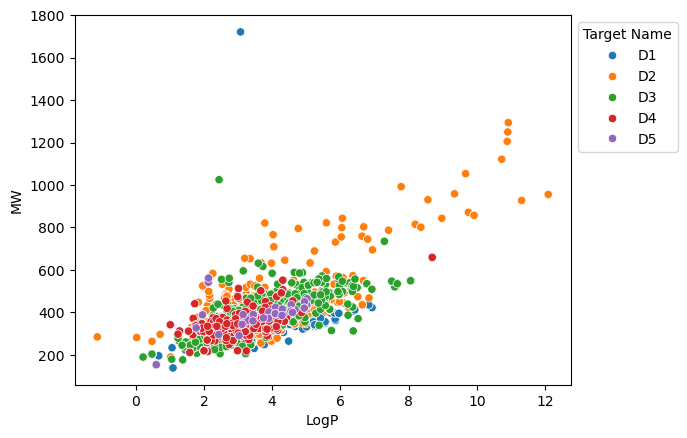

In [ ]:
ax = sns.scatterplot(data=df_updated,x='LogP',y='MW',hue='Target Name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

* D4 is quite concentrated.
* D2s are varied.
* A potential outlier for D1 (near MW 1800 g/mol).

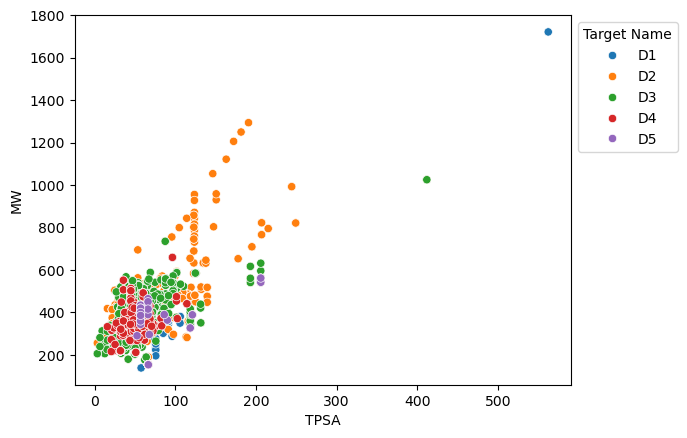

In [ ]:
ax = sns.scatterplot(data=df_updated,x='TPSA',y='MW',hue='Target Name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
df_updated['Ring_Count'].unique()

array([ 3.,  2.,  4.,  6.,  1.,  5.,  8.,  7., 10., 12.])

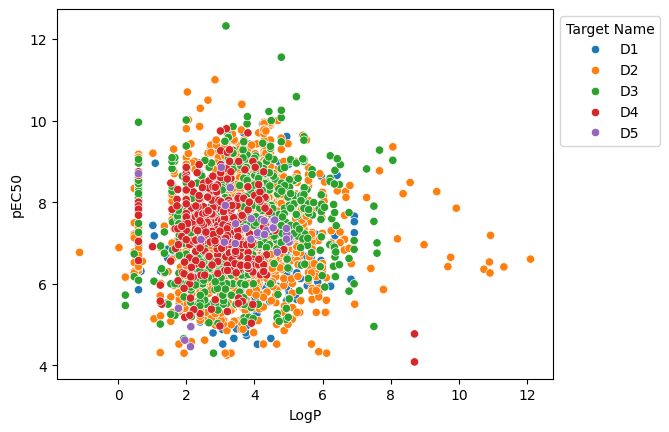

In [ ]:
ax = sns.scatterplot(data=df_updated,x='LogP',y='pEC50',hue='Target Name')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

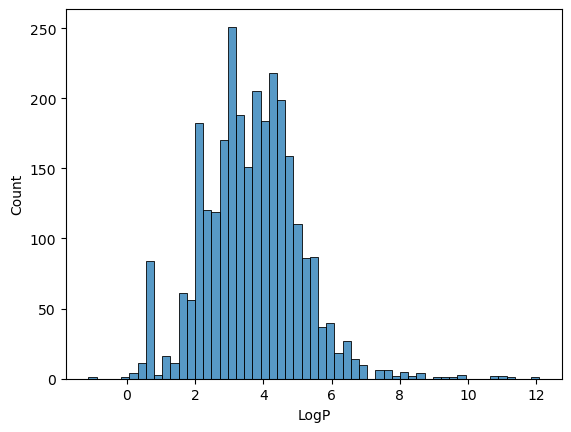

In [ ]:
sns.histplot(data=df_updated,x='LogP')
plt.show()

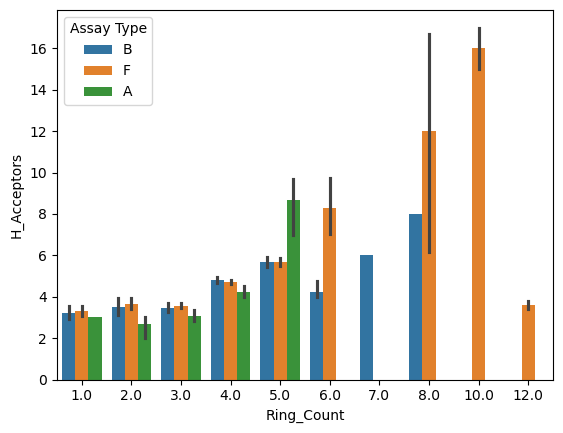

In [ ]:
sns.barplot(data=df_updated,x='Ring_Count',y='H_Acceptors',hue='Assay Type')
plt.show()

* As ring count increases, H acceptors also increase.
* functional assays have used molecules with higher ring count. 

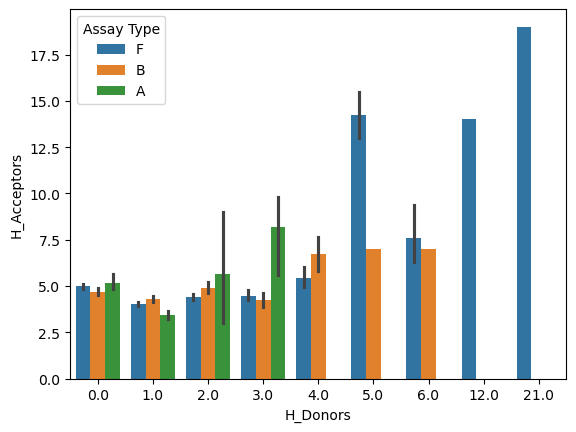

In [ ]:
sns.barplot(data=df_updated,x='H_Donors',y='H_Acceptors',hue='Assay Type')
plt.show()

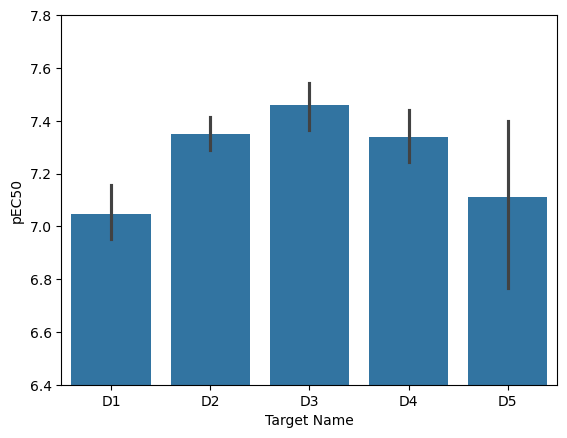

In [ ]:
ax = sns.barplot(data=df_updated,x='Target Name',y='pEC50')
plt.ylim(6.4,7.8)
plt.show()

Since we are working with pEC50 values, they are quite sensitive. Thus, it is a good indication for our project that they are distinct with respect to the receptor types (except, D5) 

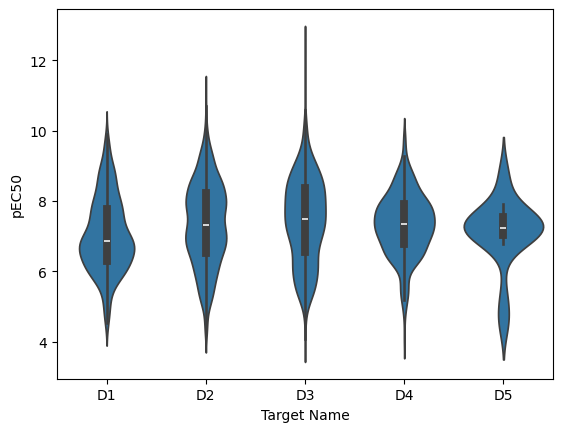

In [ ]:
ax = sns.violinplot(data=df_updated,x='Target Name',y='pEC50')
#plt.ylim(6.4,7.8)
plt.show()

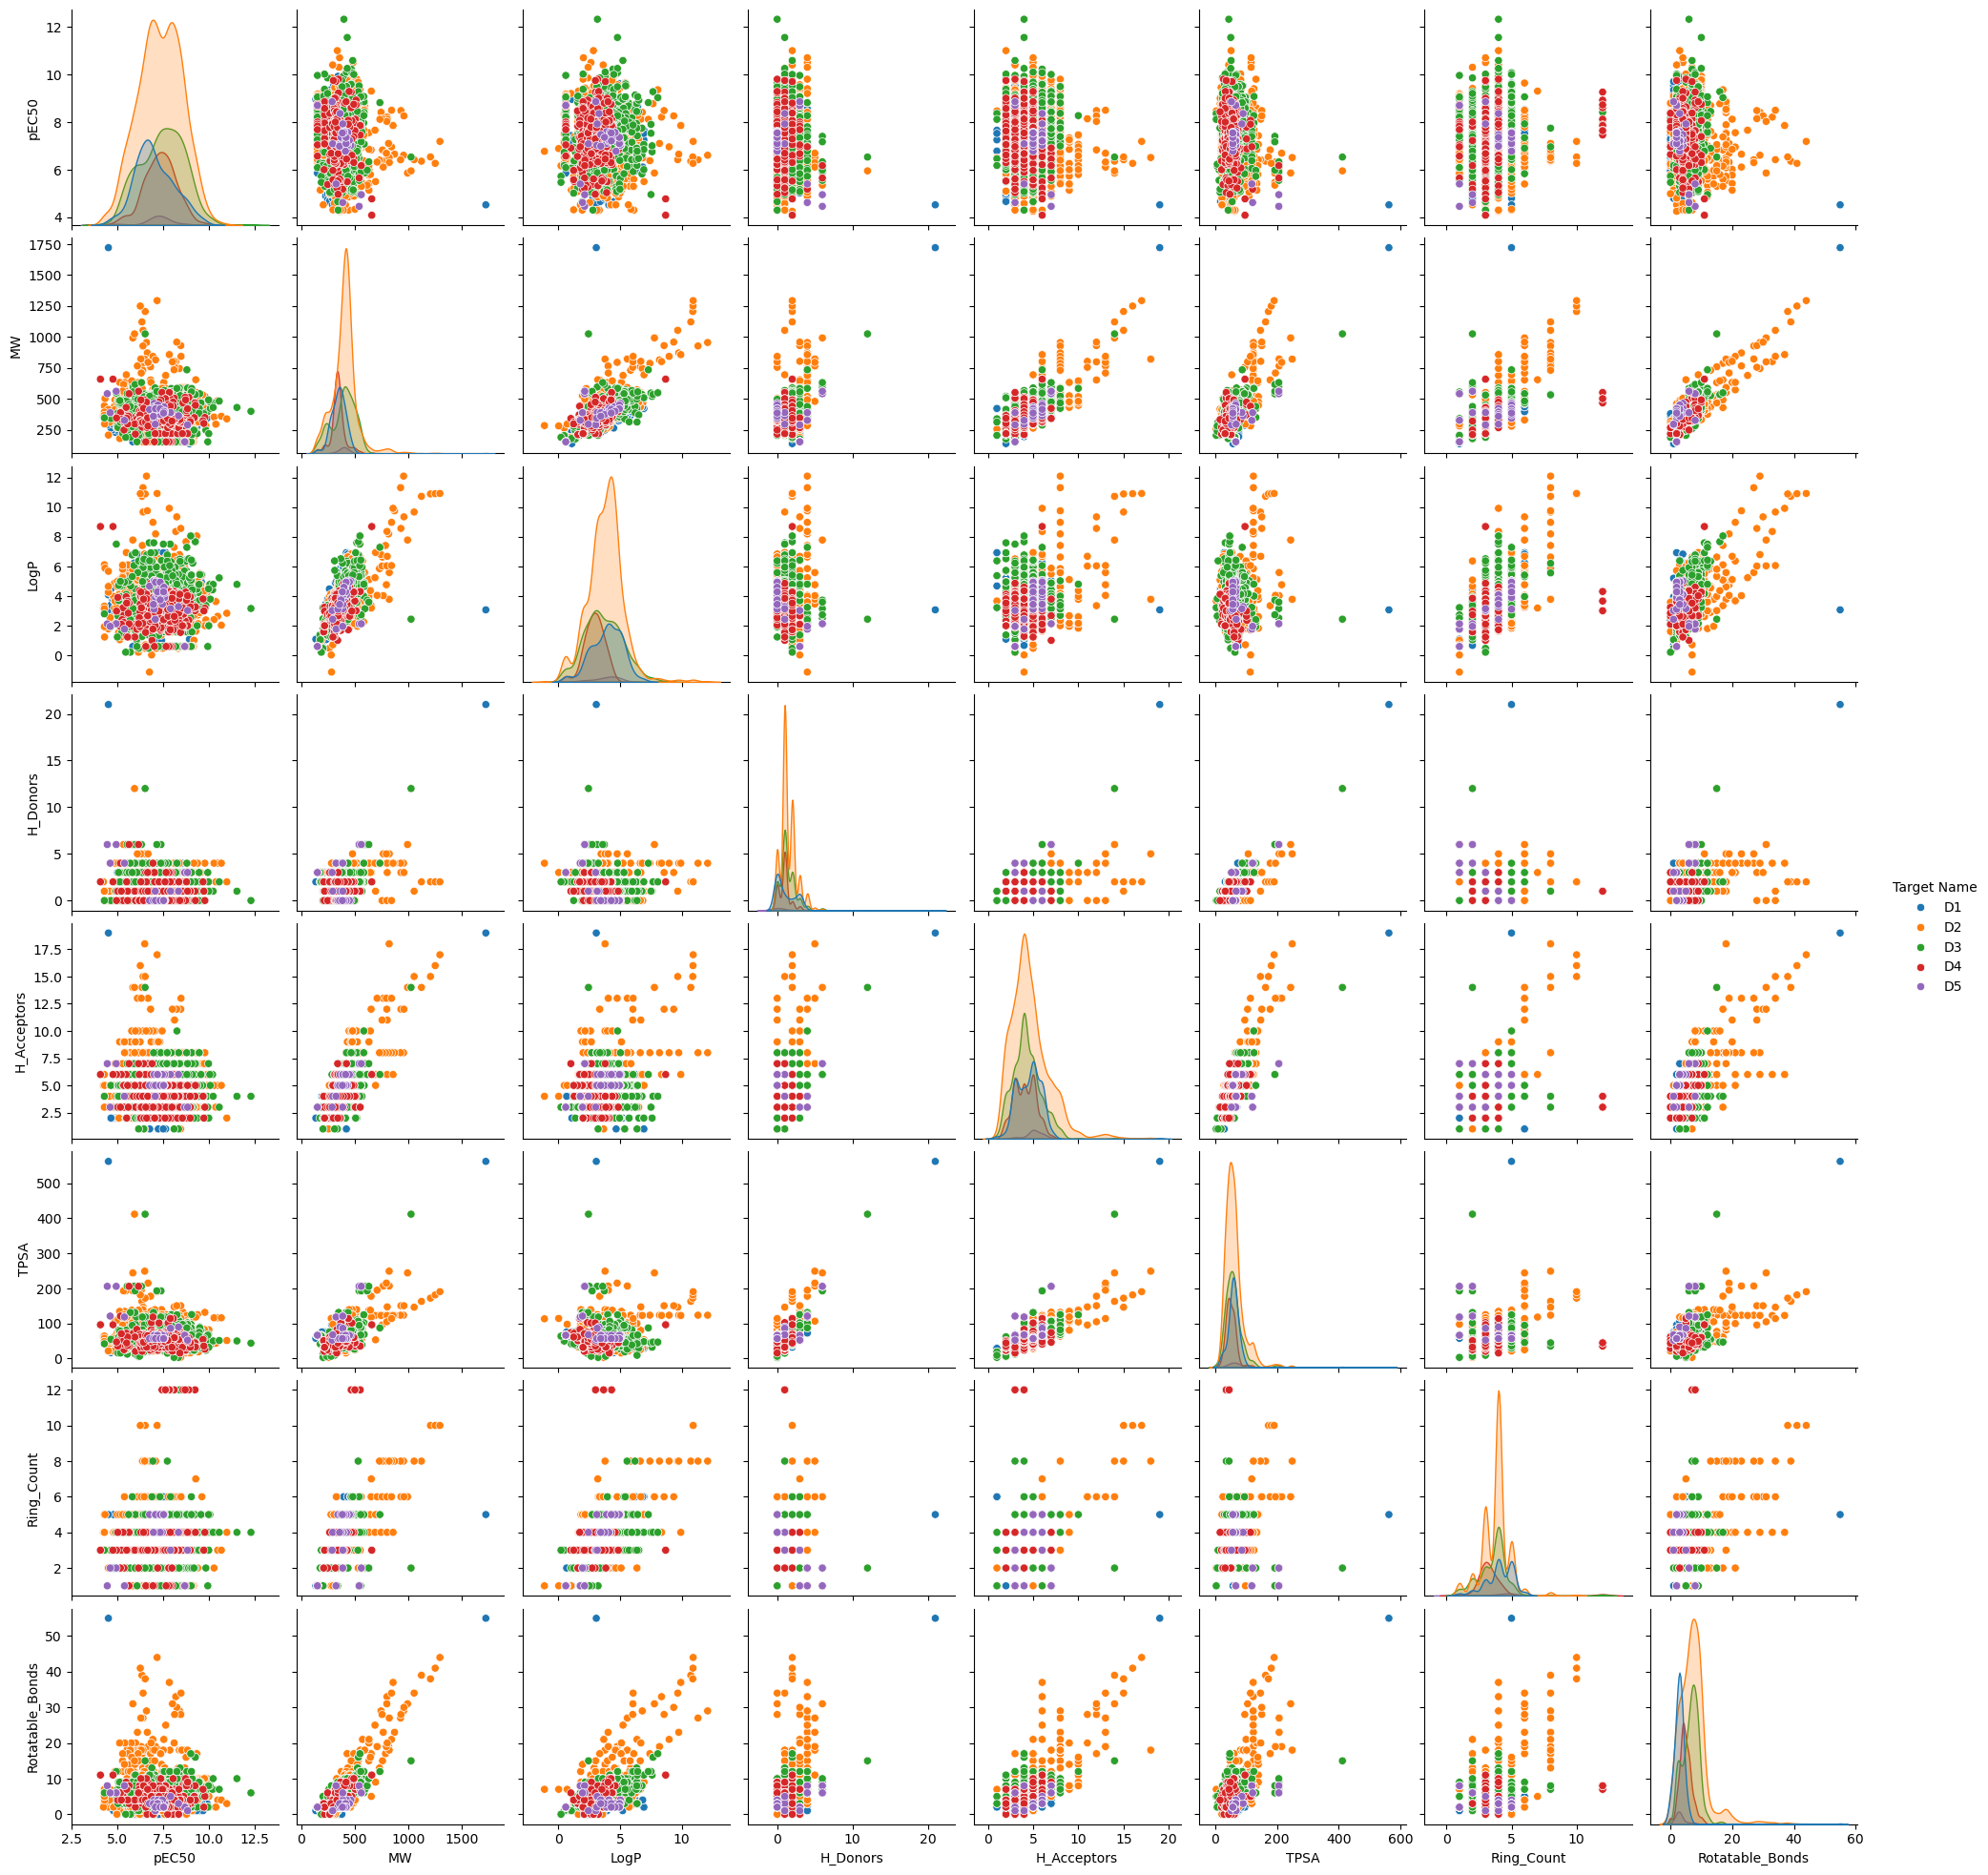

In [ ]:
sns.pairplot(data=df_updated,hue='Target Name')
plt.show()

In [ ]:
df_updated.head()

Assay Type Target Name     pEC50       MW    LogP  H_Donors  H_Acceptors  \
0          F          D1  6.625252  315.369  2.2902       3.0          5.0   
1          F          D1  6.847712  223.272  1.4489       3.0          4.0   
2          F          D1  7.866461  279.380  3.0093       3.0          4.0   
3          F          D1  7.903090  315.413  2.8833       3.0          4.0   
4          F          D1  7.463442  285.343  2.2816       3.0          4.0   

    TPSA  Ring_Count  Rotatable_Bonds  
0  84.94         3.0              4.0  
1  75.71         2.0              2.0  
2  75.71         2.0              6.0  
3  61.72         3.0              4.0  
4  75.71         3.0              3.0

### I think we are all set to proceed with our machine learning project for pEC50 prediction. 

## 4. Machine Learning to predict pEC50 values

In [1]:
# necessary imports 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline 

In [2]:
# our preprocessed and cleaned data 
df = pd.read_csv('dopamine_pEC50.csv')

# Renaming Target Name column values to shorter names. 
df['Target Name'] = df['Target Name'].replace({'Dopamine D1 receptor':'D1','Dopamine D2 receptor':'D2',
                                              'Dopamine D3 receptor':'D3','Dopamine D4 receptor':'D4', 'Dopamine D5 receptor':'D5'})

# i also removed rows with pEC50 = 4.0 and 5.0 exactly
df = df[(df['pEC50']!=5.0) & (df['pEC50']!=4.0)]
df = df.reset_index().drop('index',axis=1)

df.head()

Assay Type Target Name     pEC50       MW    LogP  H_Donors  H_Acceptors  \
0          F          D1  6.625252  315.369  2.2902       3.0          5.0   
1          F          D1  6.847712  223.272  1.4489       3.0          4.0   
2          F          D1  7.866461  279.380  3.0093       3.0          4.0   
3          F          D1  7.903090  315.413  2.8833       3.0          4.0   
4          F          D1  7.463442  285.343  2.2816       3.0          4.0   

    TPSA  Ring_Count  Rotatable_Bonds  
0  84.94         3.0              4.0  
1  75.71         2.0              2.0  
2  75.71         2.0              6.0  
3  61.72         3.0              4.0  
4  75.71         3.0              3.0

In [3]:
# X and y split 

X = df.drop('pEC50',axis=1)
y = df['pEC50']

X.shape, y.shape

((2860, 9), (2860,))

In [4]:
# train, test, val splits
from sklearn.model_selection import train_test_split

# performing the train, validation and hold-out dataset split now (80/10/10) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_hold, y_val, y_hold = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

In [5]:
X_train.shape, X_val.shape, X_hold.shape, y_train.shape, y_val.shape, y_hold.shape

((2288, 9), (286, 9), (286, 9), (2288,), (286,), (286,))

* I should combine the train and validation dataset since it will be used later to perform hyperparameter tuning using either GridSearchCV or RandomizedSearchCV. I will call this as the X_practise, y_practise = X_prac, y_prac = X_train + X_val, y_train+y_val sets.

* Need to scale X_practise set as well while doing the cross-validation. Will use a pipeline for it.

In [6]:
# creating X_practise set for its later use in cross-validation

X_combine = [X_train, X_val]

X_prac = pd.concat(X_combine)

# creating y_practise set for its later use in cross-validation

y_combine = [y_train, y_val]

y_prac = pd.concat(y_combine)

Preprocessing our data.

In [7]:
# cat feats = ['Assay Type', 'Target Name']
# num feats = ['pEC50', 'MW', 'LogP', 'H_Donors','H_Acceptors', 'TPSA', 'Ring_Count', 'Rotatable_Bonds']

# setting up the preprocessor
# we don't have any missing values. It has been ensured already. 
# we need to one hot encode the categorical columns and scale the numerical features

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(101)

cat_feat = ['Assay Type', 'Target Name']
cat_transformer = OneHotEncoder().set_output(transform="default")

num_feat = ['MW', 'LogP', 'H_Donors','H_Acceptors', 'TPSA', 'Ring_Count', 'Rotatable_Bonds']
num_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[ ("cat",cat_transformer,cat_feat),
                                               ("num",num_transformer,num_feat)])

Our preprocessor is ready. Let's check if it works or not by fit-transforming X_train.

In [8]:
transformed_df = preprocessor.fit_transform(X_train)
df_new = pd.DataFrame(transformed_df,columns=preprocessor.get_feature_names_out())
df_new

cat__Assay Type_A  cat__Assay Type_B  cat__Assay Type_F  \
0                   0.0                1.0                0.0   
1                   0.0                1.0                0.0   
2                   0.0                0.0                1.0   
3                   1.0                0.0                0.0   
4                   1.0                0.0                0.0   
...                 ...                ...                ...   
2283                0.0                0.0                1.0   
2284                0.0                0.0                1.0   
2285                0.0                1.0                0.0   
2286                1.0                0.0                0.0   
2287                0.0                0.0                1.0   

      cat__Target Name_D1  cat__Target Name_D2  cat__Target Name_D3  \
0                     0.0                  0.0                  0.0   
1                     0.0                  1.0                  0.0   
2                     0.0                  0.0                  1.0   
3                     0.0                  1.0                  0.0   
4                     0.0                  1.0                  0.0   
...                   ...                  ...                  ...   
2283                  0.0                  1.0                  0.0   
2284                  0.0                  1.0                  0.0   
2285                  0.0                  1.0                  0.0   
2286                  0.0                  1.0                  0.0   
2287                  0.0                  1.0                  0.0   

      cat__Target Name_D4  cat__Target Name_D5   num__MW  num__LogP  \
0                     1.0                  0.0 -0.565049  -0.556008   
1                     0.0                  0.0  0.062169   0.557937   
2                     0.0                  0.0  1.329974   1.266258   
3                     0.0                  0.0 -0.198864   0.168725   
4                     0.0                  0.0 -0.194313  -0.687287   
...                   ...                  ...       ...        ...   
2283                  0.0                  0.0  0.546020   0.410868   
2284                  0.0                  0.0 -1.156001  -0.007347   
2285                  0.0                  0.0 -0.309378  -0.276160   
2286                  0.0                  0.0 -0.017690  -0.530966   
2287                  0.0                  0.0  1.769411   0.852499   

      num__H_Donors  num__H_Acceptors  num__TPSA  num__Ring_Count  \
0         -0.257735         -0.264814  -0.478377         0.212699   
1         -0.257735          0.282022  -0.292961         0.212699   
2         -0.257735         -0.264814  -0.464496         0.212699   
3         -0.257735         -1.358484  -0.769557        -0.610744   
4         -0.257735         -0.264814   0.085804         0.212699   
...             ...               ...        ...              ...   
2283      -0.257735         -0.264814  -0.464496         0.212699   
2284      -1.109901         -1.905320  -1.838429        -1.434187   
2285      -1.109901          0.282022  -0.099943         0.212699   
2286      -1.109901          0.282022  -0.251978        -0.610744   
2287       1.446596          1.375692   1.416440         1.036142   

      num__Rotatable_Bonds  
0                -0.519482  
1                 0.664121  
2                -0.046040  
3                -0.519482  
4                -0.282761  
...                    ...  
2283              0.190680  
2284              0.190680  
2285             -0.992923  
2286              0.190680  
2287              0.190680  

[2288 rows x 15 columns]

Great! Our preprocessor works!

Now, we are ready for performing Machine Learning. Using the Scikit-Learn map, we will first begin with the base models (with their default hyperparamters) and then determine the R^2 of each for comparison. These are: 

1. RidgeRegression
2. SVR(kernel="linear")
3. SVR(kernel="rbf")
4. RandomForestRegressor

In [19]:
# importing our models 

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [13]:
# a function to fit, train the model and return the training and validation scores (to check the possibility of over/under-fitting)

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

def fit_and_score(name, model,X_train, X_val,y_train,y_val):
    # need to set random seed 
    np.random.seed(101)

    # fitting and getting y_preds
    model.fit(X_train,y_train)
    y_train_preds = model.predict(X_train)
    y_val_preds = model.predict(X_val)

    # calculating training and validation set scores
    mae_t = mean_absolute_error(y_train,y_train_preds)
    rmse_t = np.sqrt(mean_squared_error(y_train,y_train_preds))
    r2_t = r2_score(y_train,y_train_preds)

    mae_v = mean_absolute_error(y_val,y_val_preds)
    rmse_v = np.sqrt(mean_squared_error(y_val,y_val_preds))
    r2_v = r2_score(y_val,y_val_preds)

    dict = {}
    dict[name] = [mae_t,rmse_t,r2_t,mae_v,rmse_v,r2_v]

    df = pd.DataFrame(data=dict.values(), index=dict.keys(),columns=["Train MAE","Train RMSE","Train R-squared",
                                                                    "Validation MAE","Validation RMSE","Validation R-squared"])
    
    df.index.name = 'Models'

    return df

In [27]:
np.random.seed(101)
model = RandomForestRegressor()
pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])

pipe.fit(X_train,y_train)
pipe.score(X_val,y_val)


0.4891023469821898

In [ ]:
# with pipeline including a preprocessor 

np.random.seed(101)

regression_models = {"Ridge": Ridge(),
                     "SVR_linear": SVR(kernel="linear"),
                     "SVR_rbf": SVR(kernel="rbf"),
                     "RF": RandomForestRegressor()}

df_model = []

for name, model in regression_models.items():
    
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    df_model.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))

base_models = pd.concat(df_model)
base_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                               
Ridge        0.852675    1.068672         0.113828        0.959668   
SVR_linear   0.846812    1.075082         0.103166        0.946154   
SVR_rbf      0.678855    0.901341         0.369613        0.787894   
RF           0.353742    0.503315         0.803434        0.652180   

            Validation RMSE  Validation R-squared  
Models                                             
Ridge              1.195282              0.078305  
SVR_linear         1.198467              0.073386  
SVR_rbf            1.044862              0.295689  
RF                 0.889905              0.489102

In [36]:
# a function to plot these scores

# plotting these scores for better visualisation through a function 

def plot_train_val_scores(df):

    # A df of MAE score 
    df_MAE = df[['Train MAE','Validation MAE']].sort_values("Validation MAE",ascending=True)
    dfm3_MAE = pd.melt(df_MAE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # A df of RMSE score 
    df_RMSE = df[['Train RMSE','Validation RMSE']].sort_values("Validation RMSE",ascending=True)
    dfm3_RMSE = pd.melt(df_RMSE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # Now dataframe for the R^2 value
    df_R2 = df[['Train R-squared','Validation R-squared']].sort_values("Validation R-squared",ascending=True)
    dfm3_R2 = pd.melt(df_R2.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    #set seaborn plotting aesthetics as default
    sns.set()

    #define plotting region (1 row, 3 columns)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),dpi=300)

    #create boxplot in each subplot for all scoring metrics together 

    # MAE - dfm3_MAE
    sns.barplot(data=dfm3_MAE,x="Models",y="Score value",hue="Score type", ax=axes[0]);
    sns.move_legend(
    axes[0], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # RMSE - dfm3_RMSE
    sns.barplot(data=dfm3_RMSE,x="Models",y="Score value",hue="Score type", ax=axes[1]);
    sns.move_legend(
    axes[1], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # R^2 - dfm3_R2
    sns.barplot(data=dfm3_R2,x="Models",y="Score value",hue="Score type", ax=axes[2]);
    sns.move_legend(
    axes[2], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    axes[0].tick_params(labelrotation=90)
    axes[1].tick_params(labelrotation=90)
    axes[2].tick_params(labelrotation=90)

    plt.tight_layout()
    return plt.show()


In [37]:
# a function to plot cross-validated scores

# plotting these scores for better visualisation through a function 

def plot_cross_val_scores(df):

    # A df of MAE score 
    df_MAE = df[['MAE']].sort_values("MAE",ascending=True)
    dfm3_MAE = pd.melt(df_MAE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # A df of RMSE score 
    df_RMSE = df[['RMSE']].sort_values("RMSE",ascending=True)
    dfm3_RMSE = pd.melt(df_RMSE.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    # Now dataframe for the R^2 value
    df_R2 = df[['R^2']].sort_values("R^2",ascending=True)
    dfm3_R2 = pd.melt(df_R2.reset_index(), id_vars='Models', var_name="Score type", value_name="Score value")

    #set seaborn plotting aesthetics as default
    sns.set()

    #define plotting region (1 row, 3 columns)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6),dpi=300)

    #create boxplot in each subplot for all scoring metrics together 

    # MAE - dfm3_MAE
    sns.barplot(data=dfm3_MAE,x="Models",y="Score value",hue="Score type", ax=axes[0]);
    sns.move_legend(
    axes[0], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # RMSE - dfm3_RMSE
    sns.barplot(data=dfm3_RMSE,x="Models",y="Score value",hue="Score type", ax=axes[1]);
    sns.move_legend(
    axes[1], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    # R^2 - dfm3_R2
    sns.barplot(data=dfm3_R2,x="Models",y="Score value",hue="Score type", ax=axes[2]);
    sns.move_legend(
    axes[2], "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )

    axes[0].tick_params(labelrotation=90)
    axes[1].tick_params(labelrotation=90)
    axes[2].tick_params(labelrotation=90)

    plt.tight_layout()
    return plt.show()


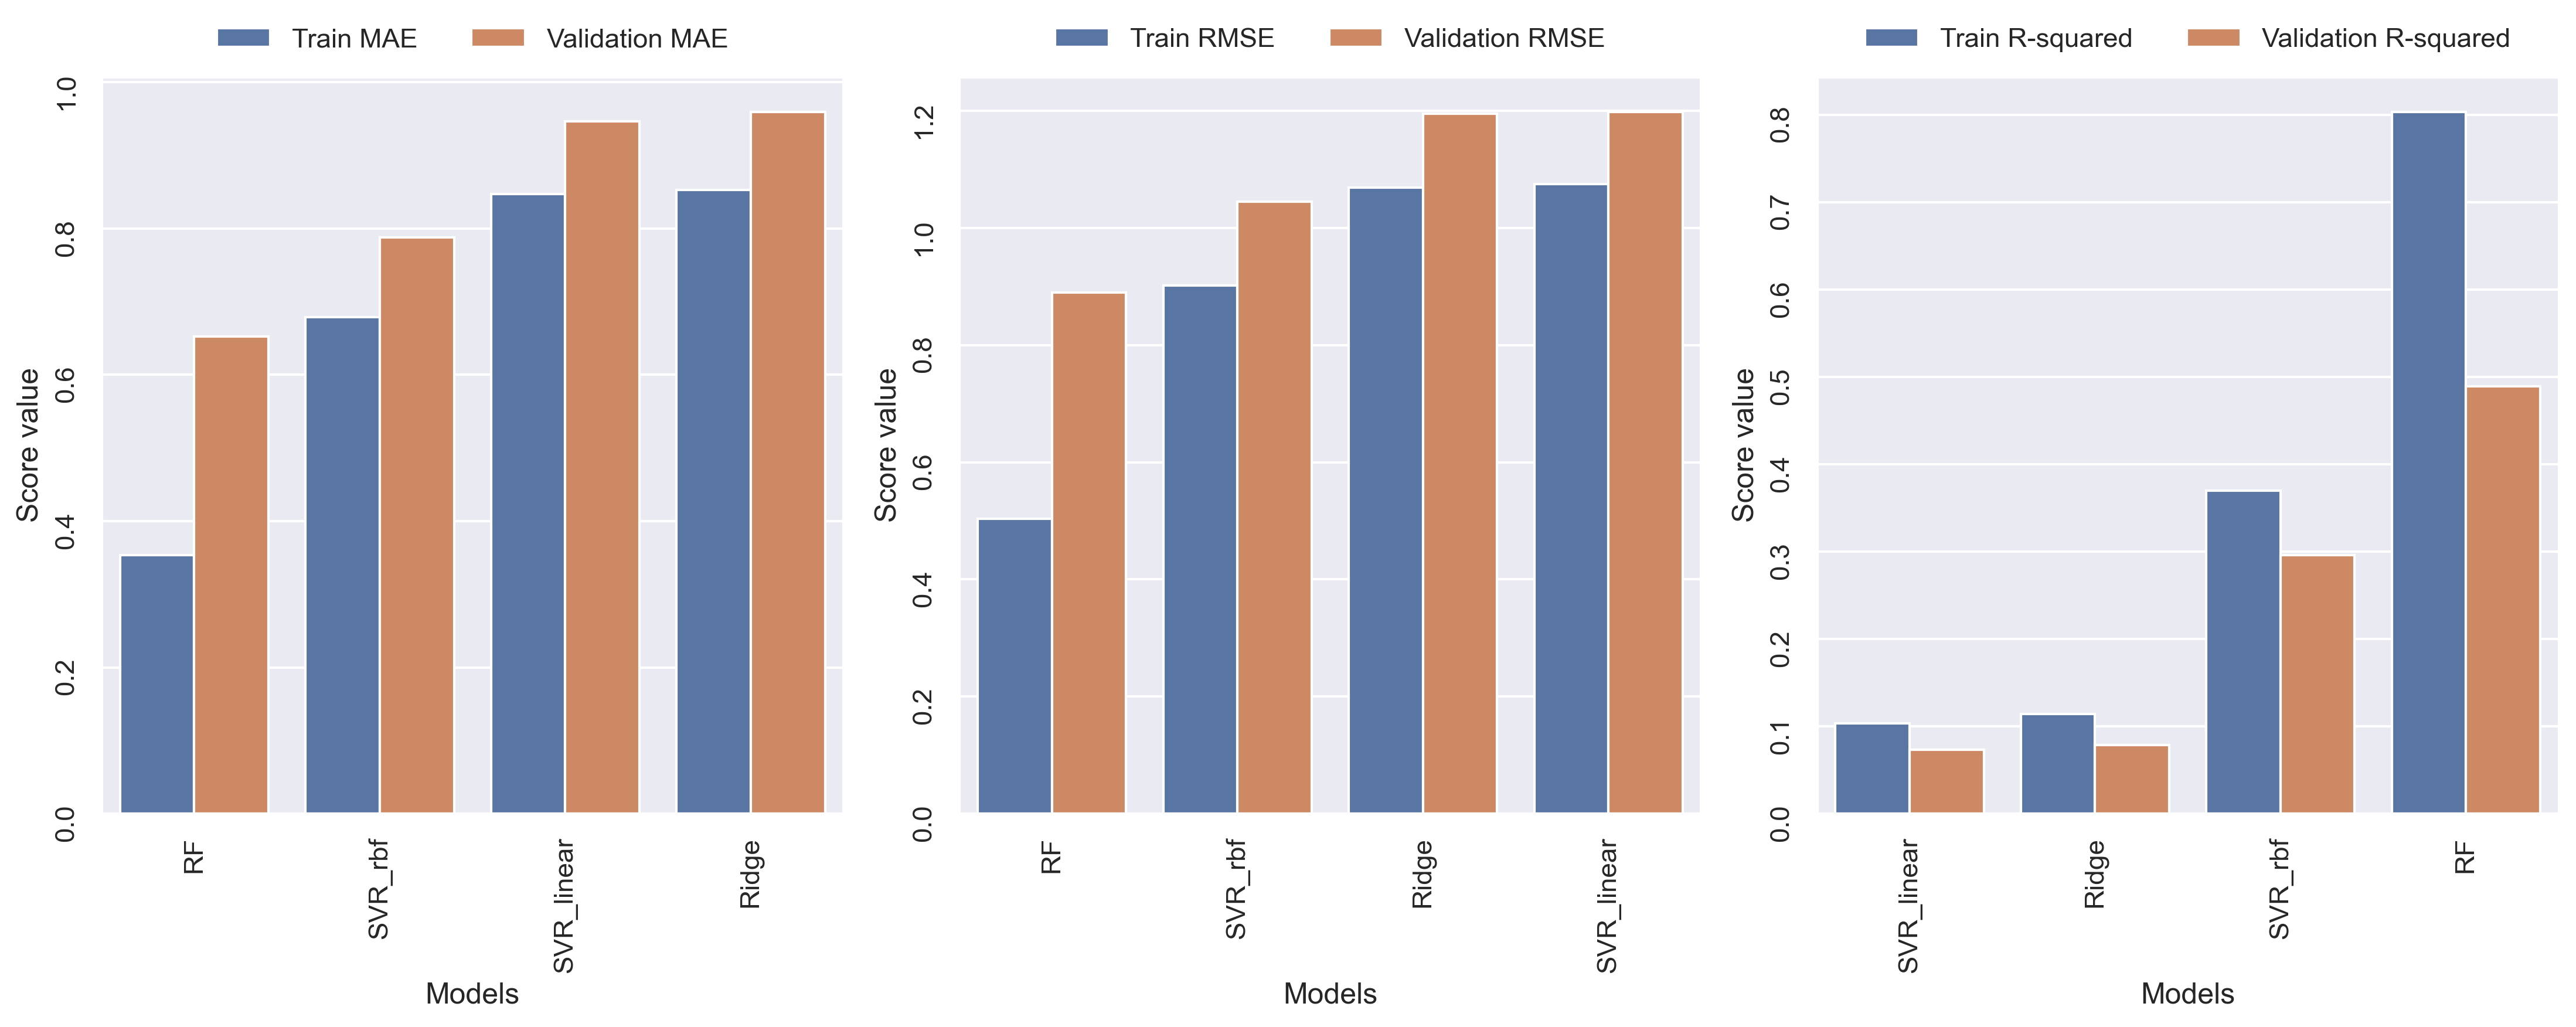

In [56]:
plot_train_val_scores(base_models)

The findings of training on our base models are listed below:
* Ridge and SVR linear models perform poorly.
* The R^2 scores of train and validation set for SVR_RBF are closer => a very good indication that our model is not overfitting or underfitting.
* Although the scores of the random forest model are the best, it strongly overfits the training dataset. Consequently, its R^2 score for validation set is relatively poor.

Although, from the above results it may appear that the RF model is relatively best, we know it is overfitting on the training dataset. So, we have to be cautious.

Let us now move ahead in trying to improve our models by performing a Randomized search CV. In particular, I will tune the hyperparameters for the SVR(rbf) and the random forest model.

* I will be using X_prac, y_prac sets to perform the CV searches to look for the best parameters.
* Then determine the training and validation set scores. I think validation scores will be enough; since cross-validation will account for the entire dataset.
* Let's check!

In [13]:
# a function to perform randomized search CV on the dataset and returns the best parameters
# our focus is on minimizing the MAE, so it will be chosen as the scoring metric

from sklearn.model_selection import RandomizedSearchCV

def RS_on_model(model, param_grid, X, y):
    np.random.seed(101)

    RS = RandomizedSearchCV(model, param_grid, cv=5, n_iter=50, verbose=True, scoring='neg_mean_absolute_error') 
    RS.fit(X,y)
    best_params = RS.best_params_

    return best_params


In [ ]:

np.random.seed(101)

# randomized search for SVR(rbf) model

models = [("SVR_rbf", SVR(kernel='rbf')), ("Random Forest", RandomForestRegressor())]

# param grid also has default values of parameters 

param_grids_RS = [{"model__C": np.logspace(-4,4,25), "model__gamma" : ["scale","auto"]}, 
                 {"model__n_estimators":np.arange(50,1001,50),
                 "model__max_depth":[None,1,3,5,10],
                 "model__min_samples_split":np.arange(2,20,2),
                 "model__min_samples_leaf":np.arange(1,20,2)}]

#dictionary for models

results = []

# a loop for all models and scores. 

for (name, model), param_grid in zip(models, param_grids_RS): 
    #np.random.seed(101)
    
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    best_result = RS_on_model(pipe, param_grid, X_prac, y_prac)

    results.append({'Model': name, 'Best parameters': best_result})

RS_results_df = pd.DataFrame(results)
RS_results_df

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


Model                                    Best parameters
0        SVR_rbf  {'model__gamma': 'scale', 'model__C': 21.54434...
1  Random Forest  {'model__n_estimators': 500, 'model__min_sampl...

In [59]:
print(RS_results_df['Best parameters'][0])
print(RS_results_df['Best parameters'][1])

{'model__gamma': 'scale', 'model__C': 21.54434690031882}
{'model__n_estimators': 500, 'model__min_samples_split': 6, 'model__min_samples_leaf': 1, 'model__max_depth': None}


In [34]:
# a function to determine the cross-validated scores from the X_practise and y_practise sets

from sklearn.model_selection import cross_val_score

def model_cross_val_scores(model,name, X, y):
    np.random.seed(101)
        
    # on validation test set 
    
    mean_cv_mae = np.mean(cross_val_score(model,X,y,cv=5,scoring="neg_mean_absolute_error"))
    mean_cv_rmse = np.mean(cross_val_score(model,X,y,cv=5,scoring="neg_root_mean_squared_error"))
    mean_cv_r2 = np.mean(cross_val_score(model,X,y,cv=5,scoring="r2"))
    
    metrics_dict = {}
    metrics_dict[name] = [(-1)*mean_cv_mae,(-1)*mean_cv_rmse,mean_cv_r2]
    cv_metrics = pd.DataFrame(data=metrics_dict.values(),index=metrics_dict.keys(),columns=["MAE", "RMSE", "R^2"])
    
    return cv_metrics 

In [61]:
# list of my tuned/ non-tuned models by using the best parameters of the results_df

np.random.seed(101)

tuned_models = [("SVR_rbf", SVR(kernel='rbf')), ("RF", RandomForestRegressor()),
            ("Tuned SVR_rbf", SVR(kernel='rbf', gamma='scale', C=21.54434690031882)),
            ("Tuned RF", RandomForestRegressor(n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_depth=None))]

#dictionary for models

results_tuned = []

# a loop for all models and getting their cross-validated scores. 

for name, model in tuned_models: 
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    
    results_tuned.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

tuned_models_df = pd.concat(results_tuned)
tuned_models_df


MAE      RMSE       R^2
SVR_rbf        0.752343  0.980259  0.268875
RF             0.641982  0.867735  0.425364
Tuned SVR_rbf  0.707679  0.949343  0.313839
Tuned RF       0.653133  0.875347  0.416559

Well, the random forest models are performing better compared to the SVRs.

In [62]:
# getting the scores of training and validation sets for the normal RF and tuned RF model for comparison. 
# I need to check if the model still overfits or not.

rf_models = { "RF": RandomForestRegressor(),
             "Tuned RF": RandomForestRegressor(n_estimators=500, min_samples_split=6, min_samples_leaf=1, max_depth=None)}

RF_models_Scores = []

for name, model in rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    RF_models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_RF_models = pd.concat(RF_models_Scores)
df_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                             
RF         0.353742    0.503315         0.803434        0.652180   
Tuned RF   0.406391    0.556453         0.759738        0.674377   

          Validation RMSE  Validation R-squared  
Models                                           
RF               0.889905              0.489102  
Tuned RF         0.913308              0.461877

Well, the SVR model is not performing better than RF models, even if we tune it. 

The score of RF model with default hyperparameters is relatively better (not significantly) than the tuned RF model. 

Let us perform an exhaustive grid search to see if the score improves as a consequence or not.

In [11]:
# a function to perform gridsearch CV on the dataset and returns the best parameters
# keeping the scoring metric as MAE

from sklearn.model_selection import GridSearchCV

def GS_on_model(model, param_grid, X, y):
    np.random.seed(101)

    GS = GridSearchCV(model, param_grid, cv=5, verbose=True, scoring='neg_mean_absolute_error') 
    GS.fit(X,y)
    best_params = GS.best_params_

    return best_params


For performing the GridSearchCV, the following grid/hyperparameters will be set-up:
* n_estimators: 450-550, jump of 10 along with default value of 100
* min_sample_split: 4-8 jump of 1, along with default value of 2

In [ ]:
# performing gridsearchCV only on the Random Forest model
# including the default hyperparamter set as well, in case the randomizedsearchCV didn't perform on it (n_estimators=100, min_sample_split=2)

np.random.seed(101)

# grid search for the randomforest model

RF_model = RandomForestRegressor()


param_grid_RF = {"model__n_estimators":np.append(100, np.arange(450,560,10)),
                 "model__min_samples_split":np.append(2, np.arange(4,9,1))}

pipe_RF = Pipeline(steps=[("preprocessor",preprocessor), ("model",RF_model)])
best_result_RF = GS_on_model(pipe_RF, param_grid_RF, X_prac, y_prac)

# reporting the best parameters (we will make the dataframe of it later, if need be)
best_result_RF


Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'model__min_samples_split': 2, 'model__n_estimators': 490}

In [ ]:
# performing gridsearchCV only on the Random Forest model
# including the default hyperparamter set as well, in case the randomizedsearchCV didn't perform on it (n_estimators=100, min_sample_split=2)

from sklearn.pipeline import Pipeline

np.random.seed(101)

# grid search for the randomforest model

RF_model = RandomForestRegressor()


param_grid_RF = {"model__n_estimators":np.append(100, np.arange(450,560,10)),
                 "model__min_samples_split":np.append(2, np.arange(4,9,1))}

pipe_RF = Pipeline(steps=[("preprocessor",preprocessor), ("model",RF_model)])
best_result_RF = GS_on_model(pipe_RF, param_grid_RF, X_prac, y_prac)

# reporting the best parameters (we will make the dataframe of it later, if need be)
best_result_RF


Fitting 5 folds for each of 72 candidates, totalling 360 fits


{'model__min_samples_split': 2, 'model__n_estimators': 520}

In [67]:
# getting the scores of training and validation sets for the grid-search tuned RF model for comparison with our previous models. 

rf_models = { "RF": RandomForestRegressor(),
             "RS-Tuned RF": RandomForestRegressor(n_estimators=500, min_samples_split=6),
             "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2)}

RF_models_Scores = []

for name, model in rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    RF_models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_RF_models = pd.concat(RF_models_Scores)
df_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                
RF            0.353742    0.503315         0.803434        0.652180   
RS-Tuned RF   0.406391    0.556453         0.759738        0.674377   
GS-Tuned RF   0.352561    0.501990         0.804467        0.651612   

             Validation RMSE  Validation R-squared  
Models                                              
RF                  0.889905              0.489102  
RS-Tuned RF         0.913308              0.461877  
GS-Tuned RF         0.892459              0.486166

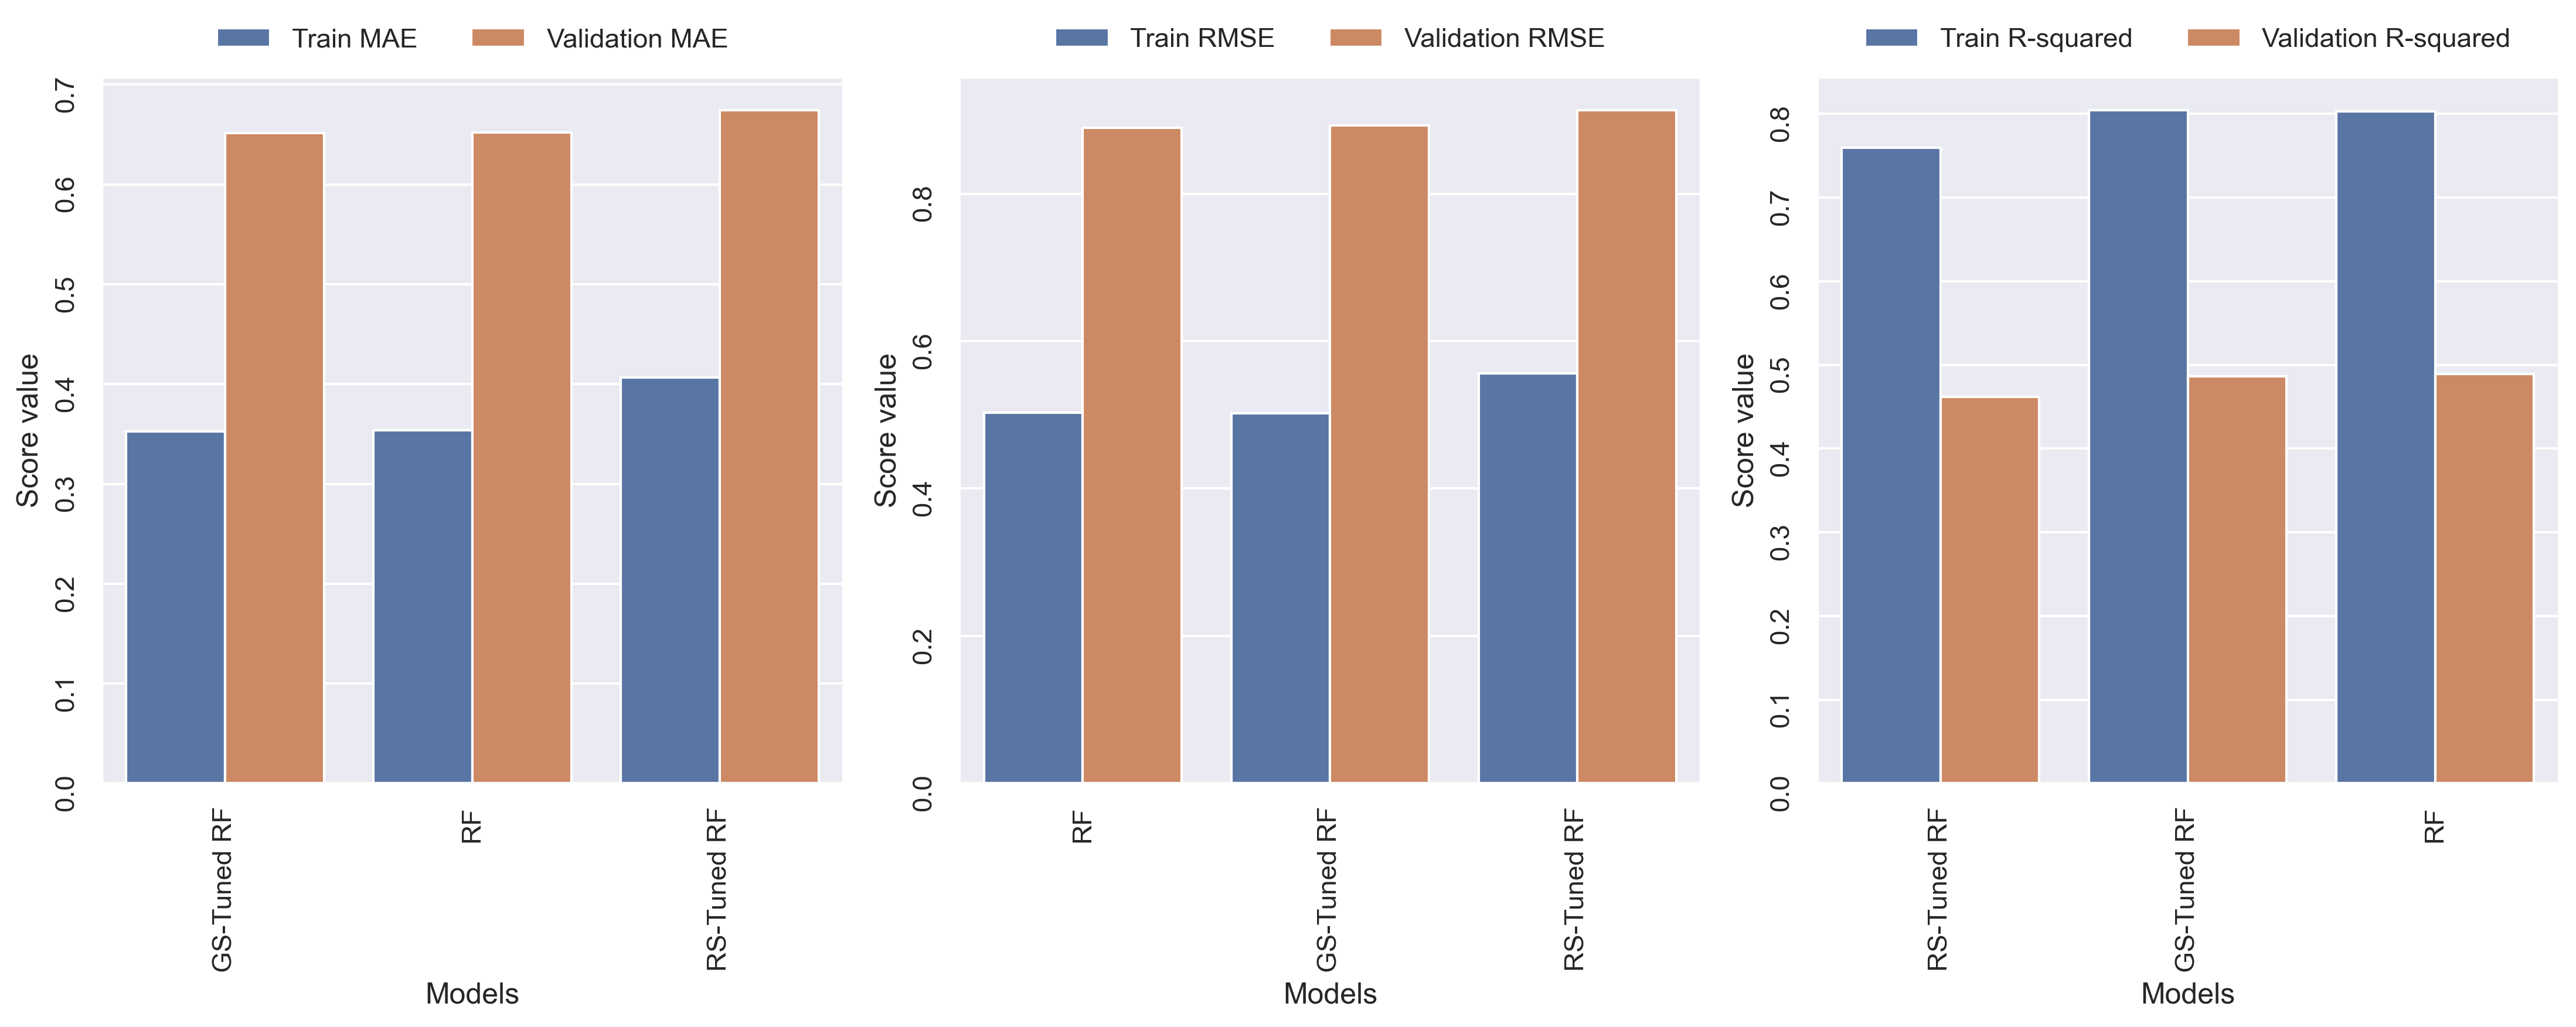

In [68]:
plot_train_val_scores(df_RF_models)

* Okay, after performing an exhaustive GridSearchCV, it can be concluded that a tuned RandomForest model performs the best with the least validation MAE (our primary scoring parameter).
* But the model is strongly overfitting on the training dataset.

#### This suggests that our hunt doesn't stop and we need to look for even better performing model.

Let us now move ahead to check some ensemble models to look for any possibility of the improvement of our score.

1. AdaBoostRegressor (AB)
2. GradientBoostingRegressor (GB)
3. XGBoost

First, I will work with the default hyperparameters of AB and GB and then I will tune them accordingly.

In [8]:
# importing the models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [76]:
ensemble_models = {'ab':AdaBoostRegressor(), 
                  'gb': GradientBoostingRegressor(), 
                  'xgb': XGBRegressor(), 
                  "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2)  } # including GS-tuned RF for comparison

ensemble_model_results = []

# a loop for all models and scores. 

for name, model in ensemble_models.items(): 
    np.random.seed(101)
    #print(name)

    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    ensemble_model_results.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))

ensemble_model_results_df = pd.concat(ensemble_model_results)
ensemble_model_results_df


Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                
ab            0.874147    1.070089         0.111477        0.980081   
gb            0.703455    0.889148         0.386553        0.822130   
xgb           0.330147    0.488158         0.815094        0.616226   
GS-Tuned RF   0.352561    0.501990         0.804467        0.651612   

             Validation RMSE  Validation R-squared  
Models                                              
ab                  1.196303              0.076729  
gb                  1.039095              0.303442  
xgb                 0.866493              0.515631  
GS-Tuned RF         0.892459              0.486166

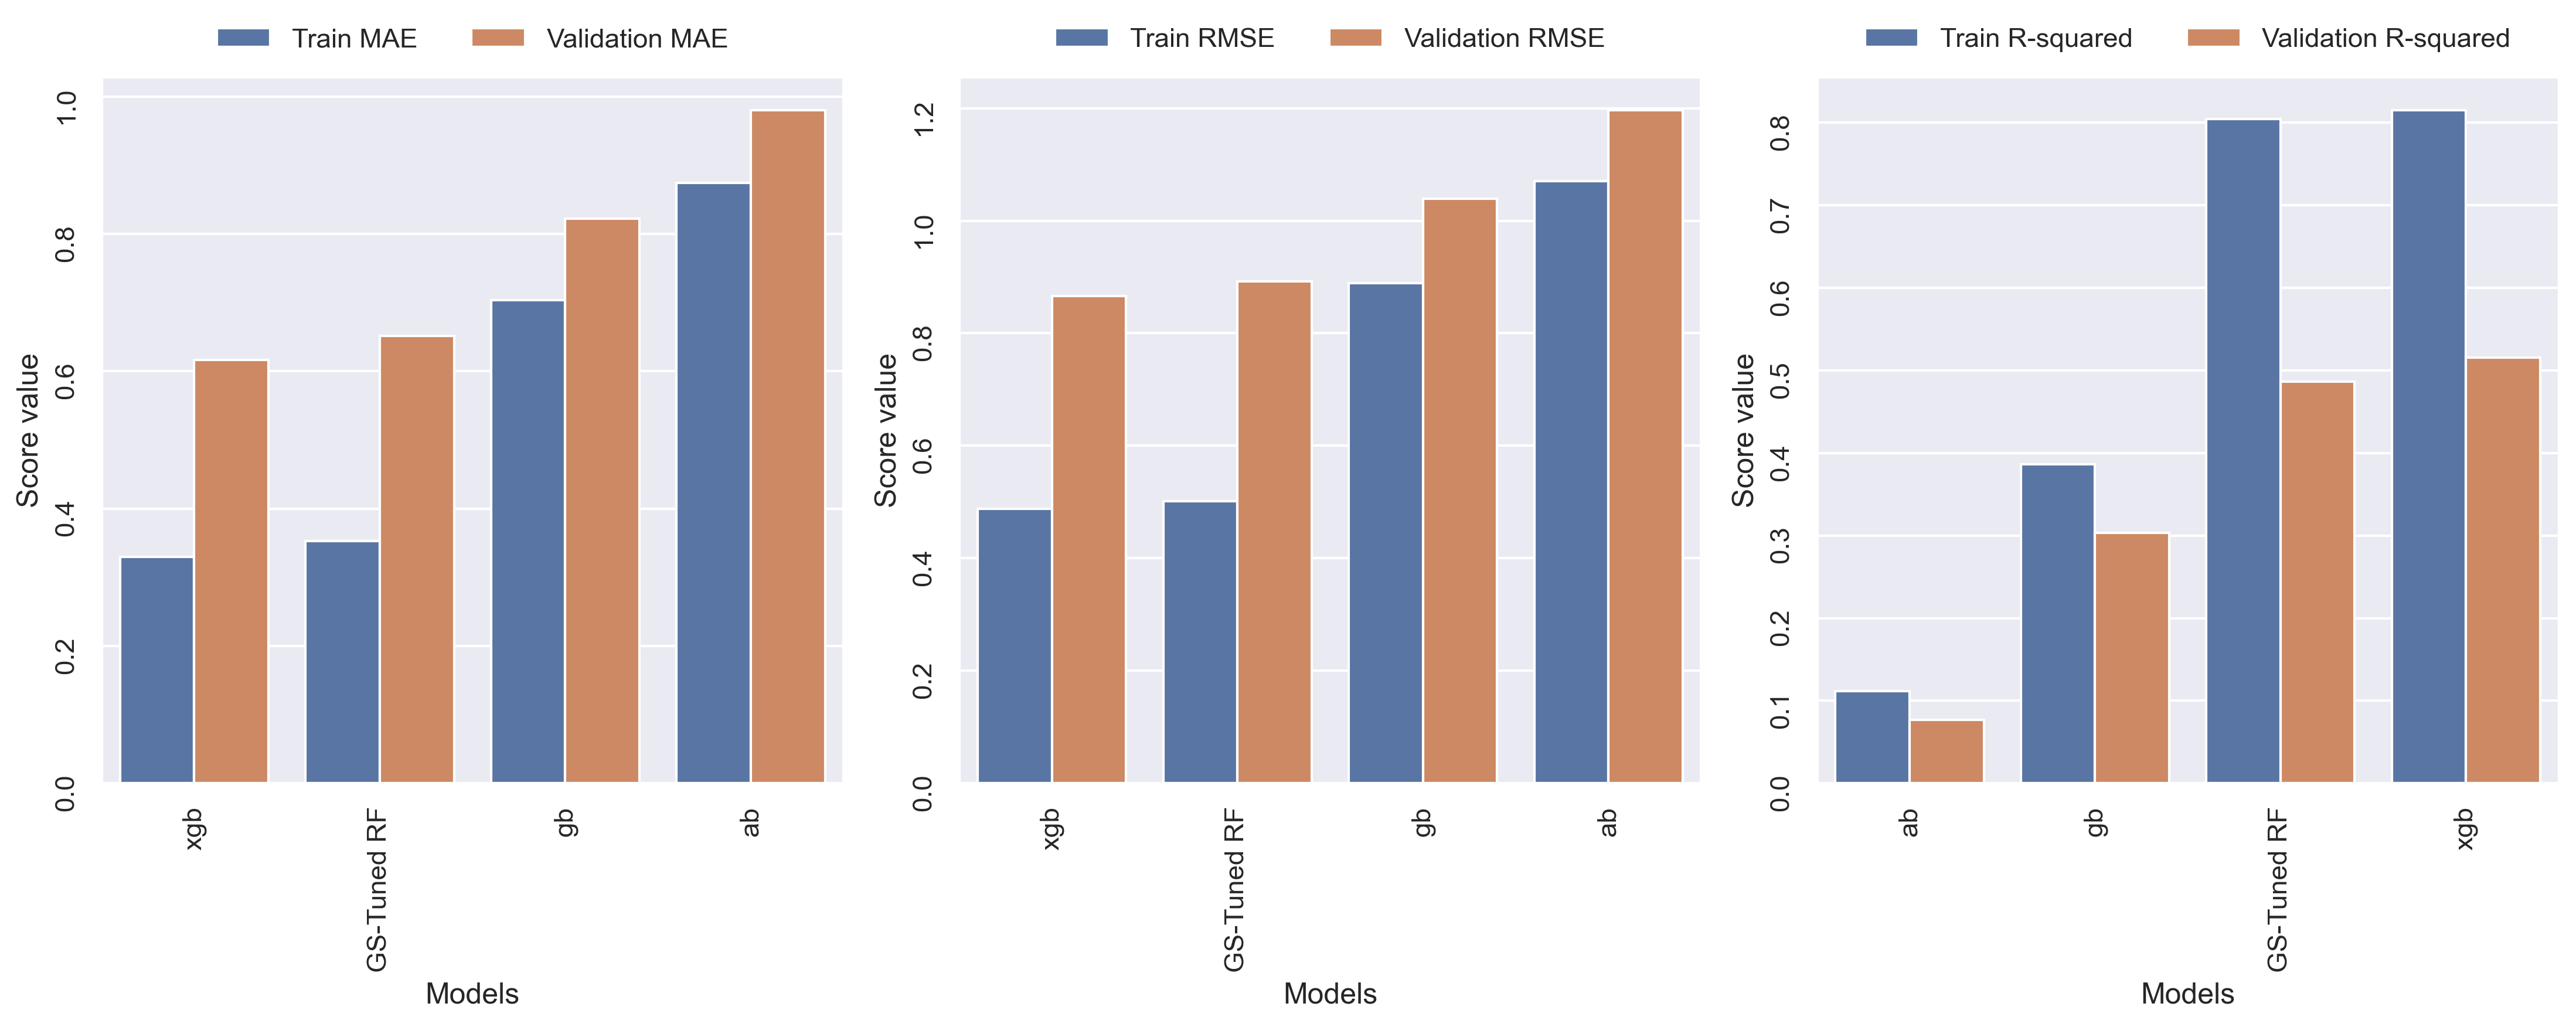

In [73]:
# visualising the results along with previous ones by including the tuned RF model

plot_train_val_scores(ensemble_model_results_df)

* Wow! It is seen that the XGBoost regressor performs the best, even outperforming our tuned RF model.
* But the issue of overfitting of training dataset persists.
* Let us try to improve our model by tuning hyperparameters of XGB and GB (where there is relatively smaller overfitting). 

In [80]:
# randomized search for XGB and GB models

np.random.seed(101)

models = [("GB", GradientBoostingRegressor()), ("XGB", XGBRegressor())]

# param grid also has default values of parameters 

param_grid_gb = [{ 'model__max_depth':range(1,11,1),
                    'model__min_samples_split':range(2,11,2),
                    'model__learning_rate': np.linspace(0.01,0.5,50),
                    'model__max_features': ['sqrt','log2']}, 
                 { 'model__max_depth':range(1,11,1),
                    'model__min_child_weight':range(0,100,10),
                    'model__learning_rate': np.linspace(0.01,0.5,50)}]

#dictionary for models

results = []

# a loop for all models and scores. 

for (name, model), param_grid in zip(models, param_grid_gb):     
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    best_result = RS_on_model(pipe, param_grid, X_prac, y_prac)

    results.append({'Model': name, 'Best parameters': best_result})

gb_results_df = pd.DataFrame(results)
gb_results_df

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


Model                                    Best parameters
0    GB  {'model__min_samples_split': 6, 'model__max_fe...
1   XGB  {'model__min_child_weight': 0, 'model__max_dep...

In [83]:
print(gb_results_df['Best parameters'][0])
print(gb_results_df['Best parameters'][1])

{'model__min_samples_split': 6, 'model__max_features': 'log2', 'model__max_depth': 9, 'model__learning_rate': 0.15000000000000002}
{'model__min_child_weight': 0, 'model__max_depth': 9, 'model__learning_rate': 0.16}


In [ ]:
# getting the scores of training and validation sets for the tuned models for comparison with our previous RF model. 
np.random.seed(101)
xgb_rf_models = { "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
                 "GB": GradientBoostingRegressor(),
                 "Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
                 "XGB": XGBRegressor(),
                 "Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16)}

models_Scores = []

for name, model in xgb_rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_XGB_RF_models = pd.concat(models_Scores)
df_XGB_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                
GS-Tuned RF   0.352561    0.501990         0.804467        0.651612   
GB            0.703455    0.889148         0.386553        0.822130   
Tuned GB      0.280952    0.456769         0.838110        0.603709   
XGB           0.330147    0.488158         0.815094        0.616226   
Tuned XGB     0.278542    0.455180         0.839234        0.610900   

             Validation RMSE  Validation R-squared  
Models                                              
GS-Tuned RF         0.892459              0.486166  
GB                  1.039095              0.303442  
Tuned GB            0.857218              0.525945  
XGB                 0.866493              0.515631  
Tuned XGB           0.887220              0.492181

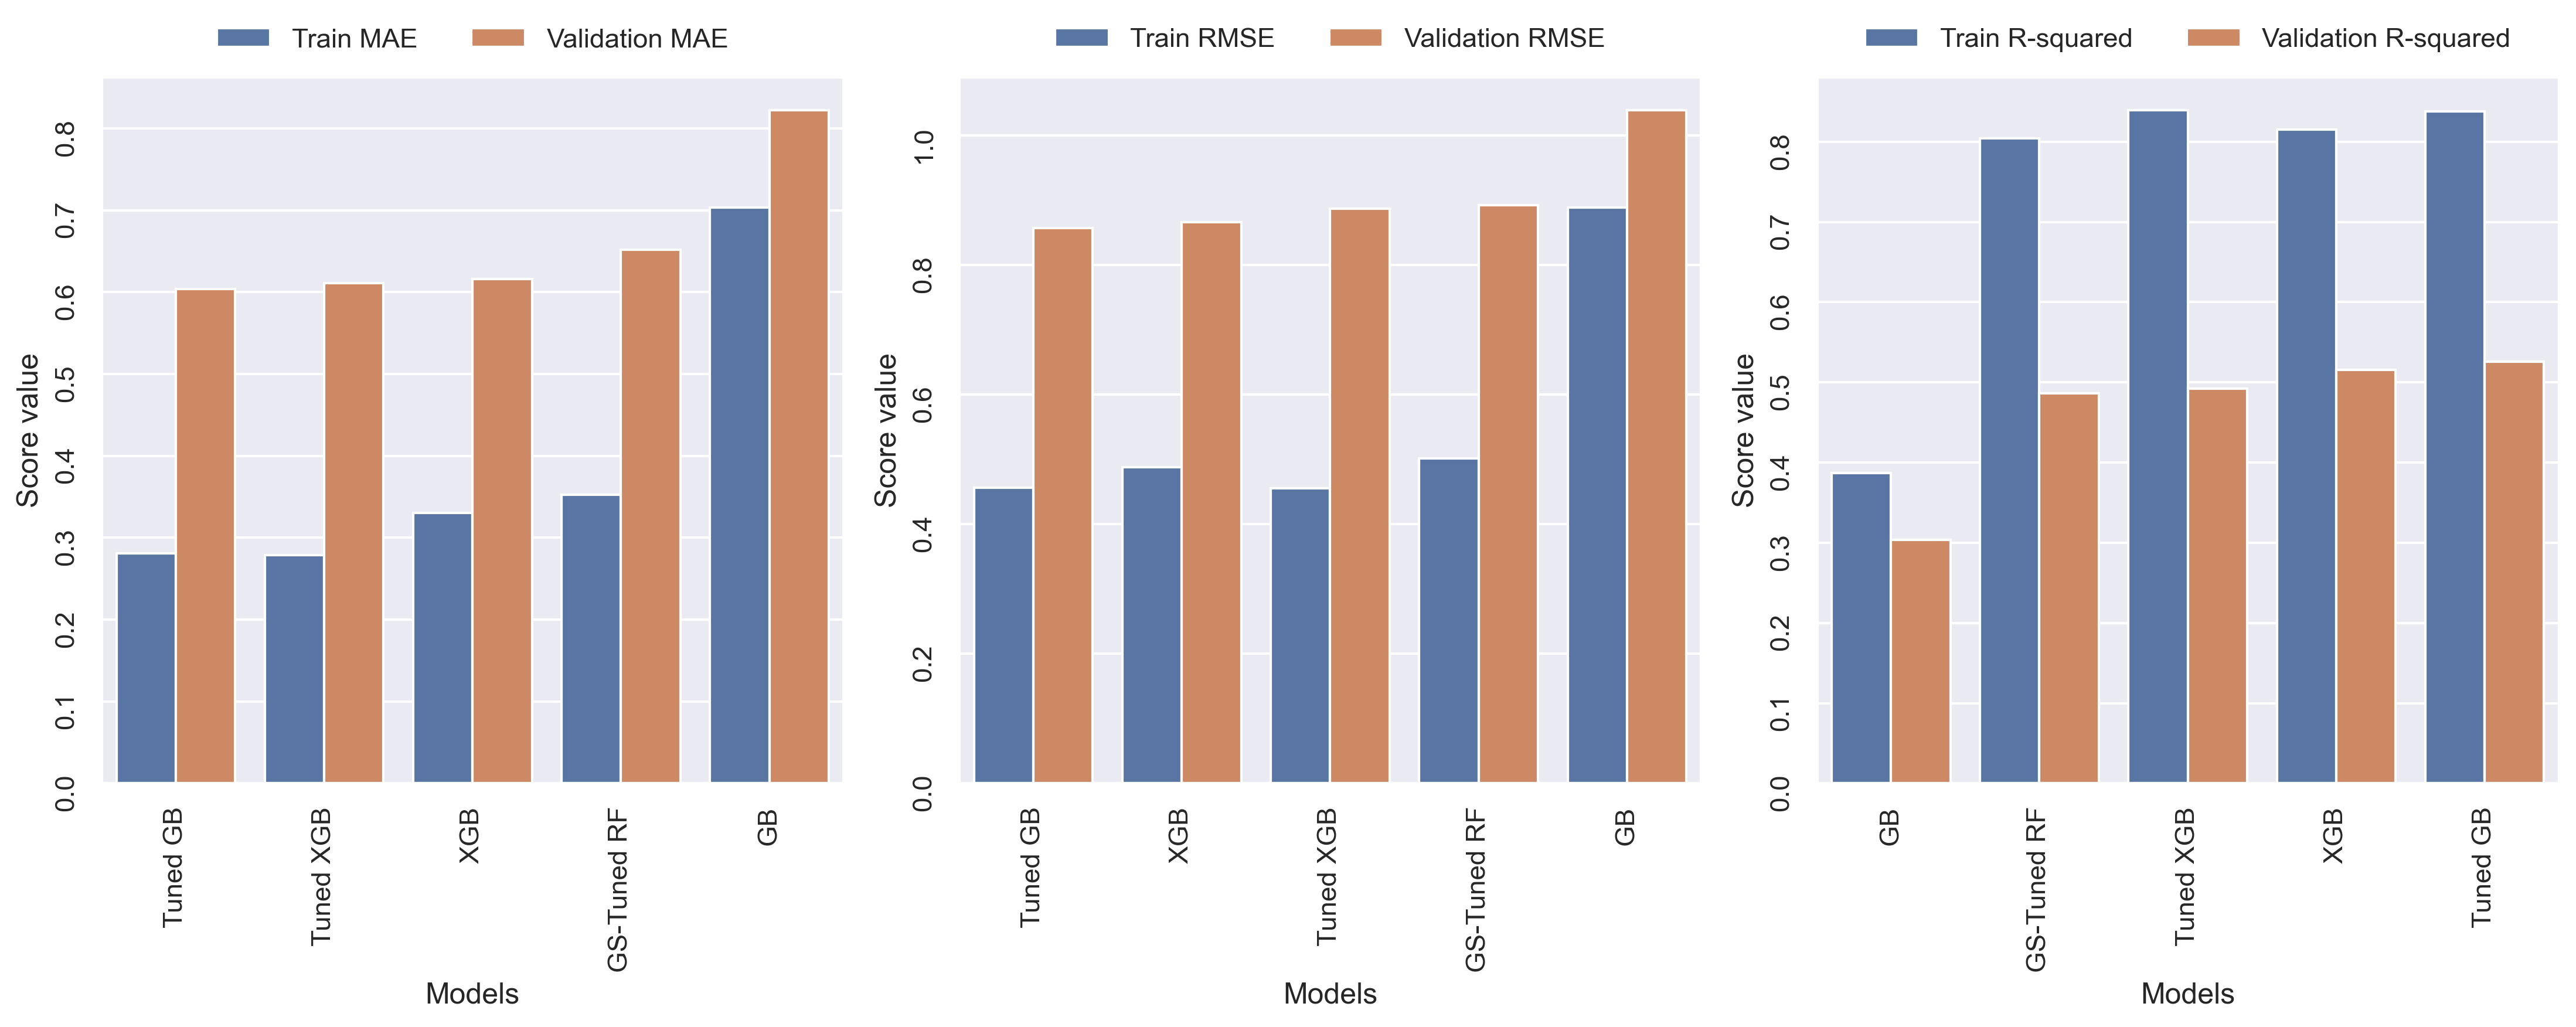

In [85]:
plot_train_val_scores(df_XGB_RF_models)

* Well the tuned GB performed the best according to all scoring parameters.
* The tuned XGB performed second-best according to our primary scoring parameter MAE.
* Altogether, focussing on the MAEs, the tuned XGB and GB models perform well! 
* However, both these models tend to overfit when compared with the GB model with default parameters. 
* It is better to perform an exhaustive gridsearch to obtain clarity.


In [16]:
# randomized search for XGB and GB models

np.random.seed(101)

models = [("GB", GradientBoostingRegressor()), ("XGB", XGBRegressor())]

# param grid also has default values of parameters 

param_grid_gb = [{ 'model__max_depth':np.append(3, np.arange(7,12,1)),
                    'model__min_samples_split':np.append(2, np.arange(4,9,1)),
                    'model__learning_rate': np.append(0.10, np.arange(0.13,0.18,0.01)),
                    'model__max_features': ['sqrt','log2']}, 
                 { 'model__max_depth':np.append(6, np.arange(7,12,1)),
                    'model__min_child_weight':[0,1,2],
                    'model__learning_rate': np.append(0.3, np.linspace(0.14,0.18,21))}]

#dictionary for models

results = []

# a loop for all models and scores. 

for (name, model), param_grid in zip(models, param_grid_gb):     
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    best_result = GS_on_model(pipe, param_grid, X_prac, y_prac)

    results.append({'Model': name, 'Best parameters': best_result})

gb_results_df = pd.DataFrame(results)
gb_results_df

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


/Users/bhawakshipunia/data_science_projects/dopamine_receptor/env2/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 396 candidates, totalling 1980 fits


Model                                    Best parameters
0    GB  {'model__learning_rate': 0.1, 'model__max_dept...
1   XGB  {'model__learning_rate': 0.14200000000000002, ...

In [17]:
print(gb_results_df['Best parameters'][0])
print(gb_results_df['Best parameters'][1])

{'model__learning_rate': 0.1, 'model__max_depth': 11, 'model__max_features': 'log2', 'model__min_samples_split': 8}
{'model__learning_rate': 0.14200000000000002, 'model__max_depth': 11, 'model__min_child_weight': 2}


In [21]:
# getting the scores of training and validation sets for the grid-search tuned RF model for comparison with our previous models. 

np.random.seed(101)
xgb_rf_models = { "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
             "GB": GradientBoostingRegressor(),
             "RS Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
             "GS Tuned GB": GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1),
             "XGB": XGBRegressor(),
             "RS Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16),
             "GS Tuned XGB": XGBRegressor(min_child_weight=2, max_depth=11, learning_rate=0.14200000000000002)}

models_Scores = []

for name, model in xgb_rf_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    models_Scores.append(fit_and_score(name, pipe,X_train,X_val,y_train,y_val))

df_XGB_RF_models = pd.concat(models_Scores)
df_XGB_RF_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                                 
GS-Tuned RF    0.352561    0.501990         0.804467        0.651612   
GB             0.703455    0.889148         0.386553        0.822130   
RS Tuned GB    0.280952    0.456769         0.838110        0.603709   
GS Tuned GB    0.282178    0.456896         0.838019        0.602160   
XGB            0.330147    0.488158         0.815094        0.616226   
RS Tuned XGB   0.278542    0.455180         0.839234        0.610900   
GS Tuned XGB   0.269062    0.451168         0.842055        0.609028   

              Validation RMSE  Validation R-squared  
Models                                               
GS-Tuned RF          0.892459              0.486166  
GB                   1.039095              0.303442  
RS Tuned GB          0.857218              0.525945  
GS Tuned GB          0.861054              0.521692  
XGB                  0.866493              0.515631  
RS Tuned XGB         0.887220              0.492181  
GS Tuned XGB         0.887269              0.492125

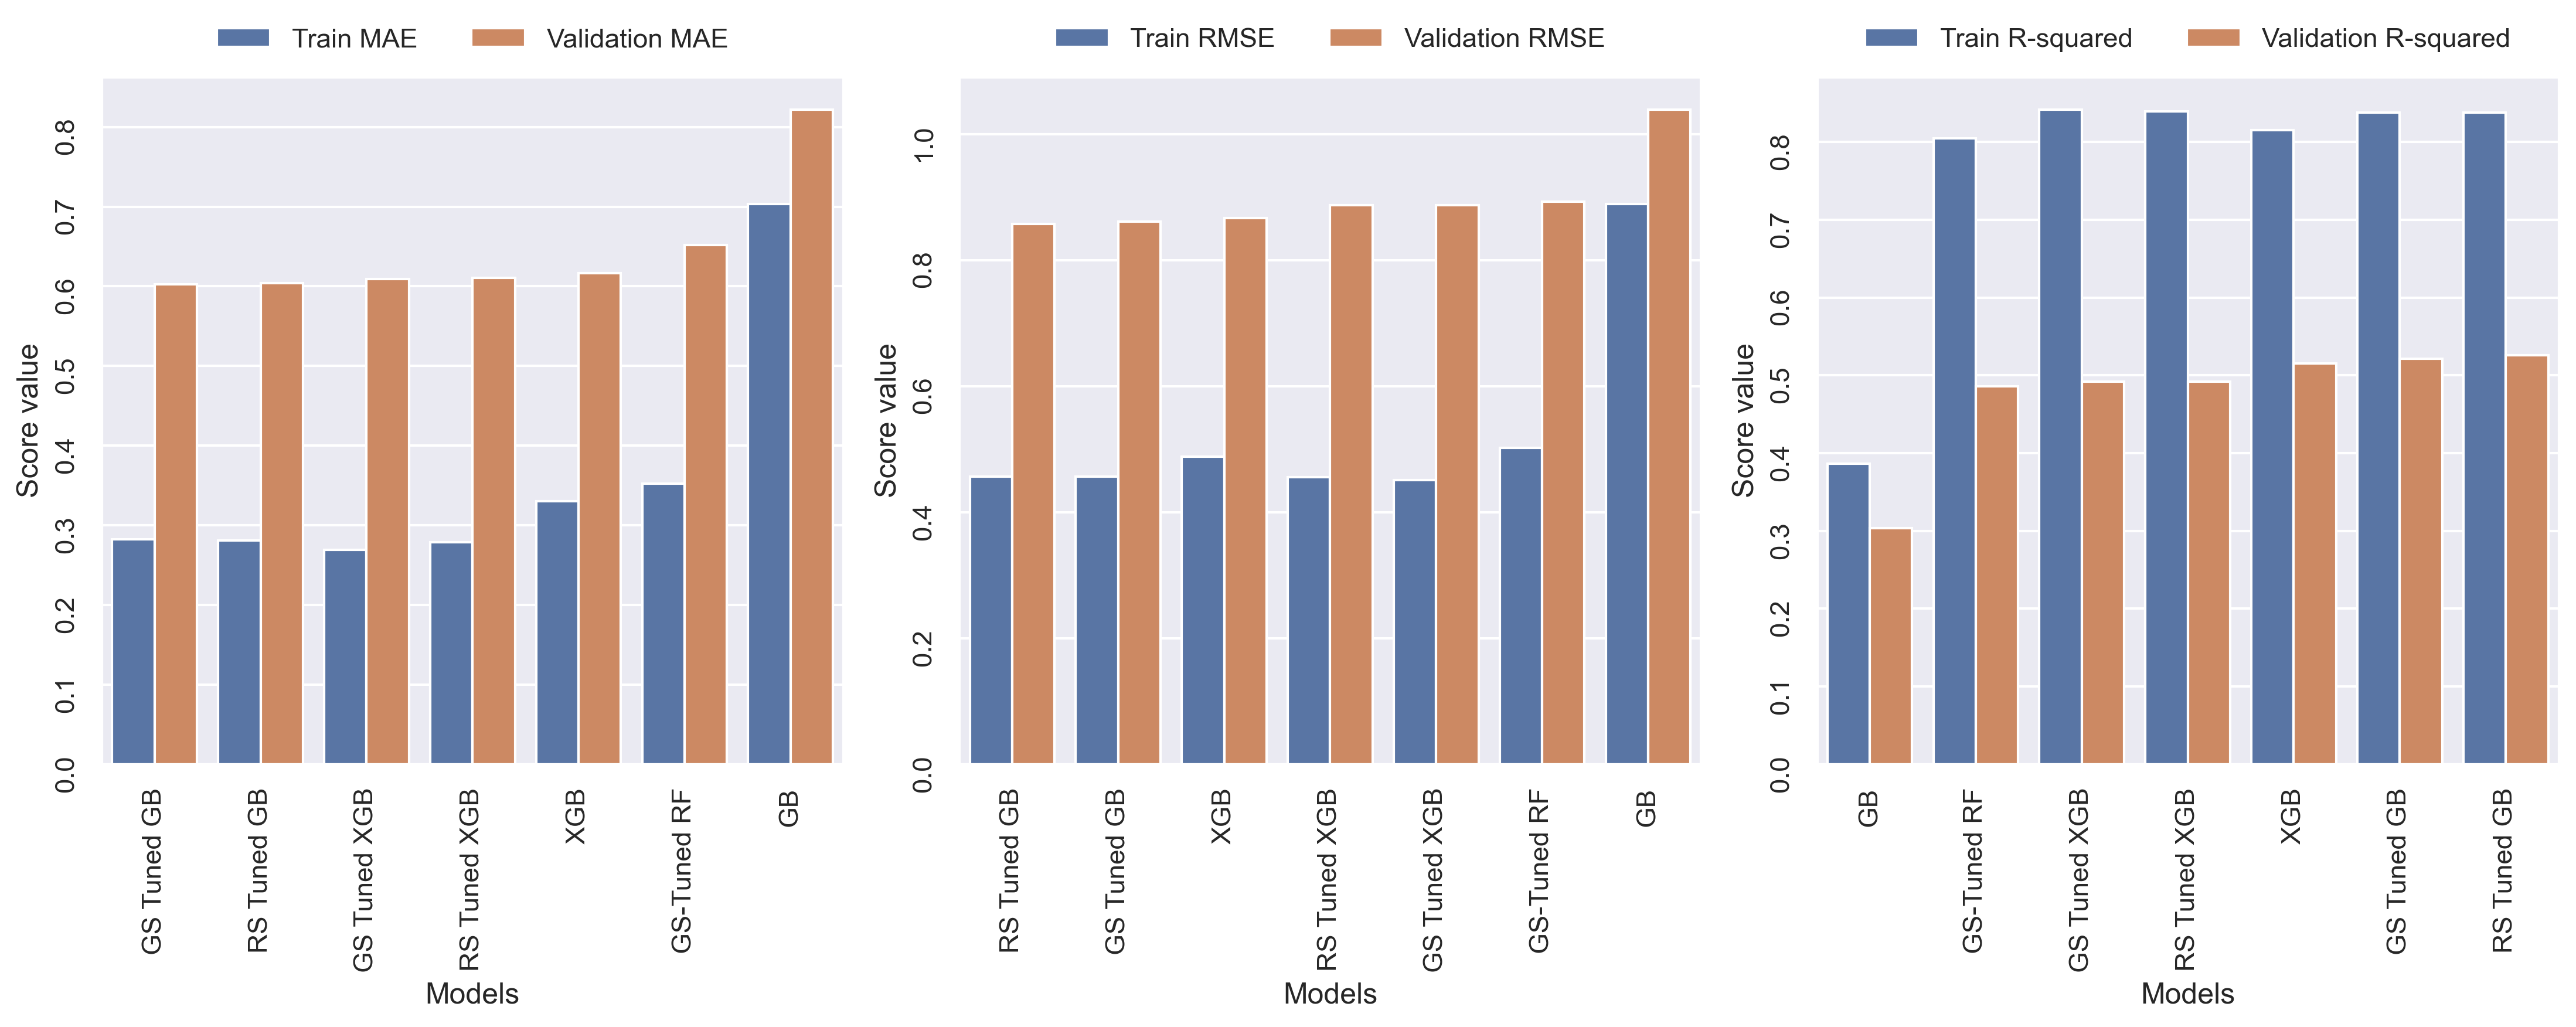

In [22]:
plot_train_val_scores(df_XGB_RF_models)

The results show that the GB models perform better than the XGB models. Let's determine cross-val scores to potentially clear our confusion.

In [38]:
# list of my tuned/ non-tuned models by using the best parameters

np.random.seed(101)
xgb_rf_models = { "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
             "GB": GradientBoostingRegressor(),
             "RS Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
             "GS Tuned GB": GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1),
             "XGB": XGBRegressor(),
             "RS Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16),
             "GS Tuned XGB": XGBRegressor(min_child_weight=2, max_depth=11, learning_rate=0.14200000000000002)}

models_cv_Scores = []

# a loop for all models and getting their cross-validated scores. 

for name, model in xgb_rf_models.items(): 
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    
    models_cv_Scores.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

tuned_models_df = pd.concat(models_cv_Scores)
tuned_models_df.index.name='Models'
tuned_models_df


MAE      RMSE       R^2
Models                                    
GS-Tuned RF   0.641970  0.869528  0.423650
GB            0.768172  0.972040  0.281619
RS Tuned GB   0.631833  0.875023  0.407489
GS Tuned GB   0.624406  0.870063  0.425749
XGB           0.645086  0.883164  0.406843
RS Tuned XGB  0.634840  0.891798  0.394614
GS Tuned XGB  0.629606  0.886842  0.401205

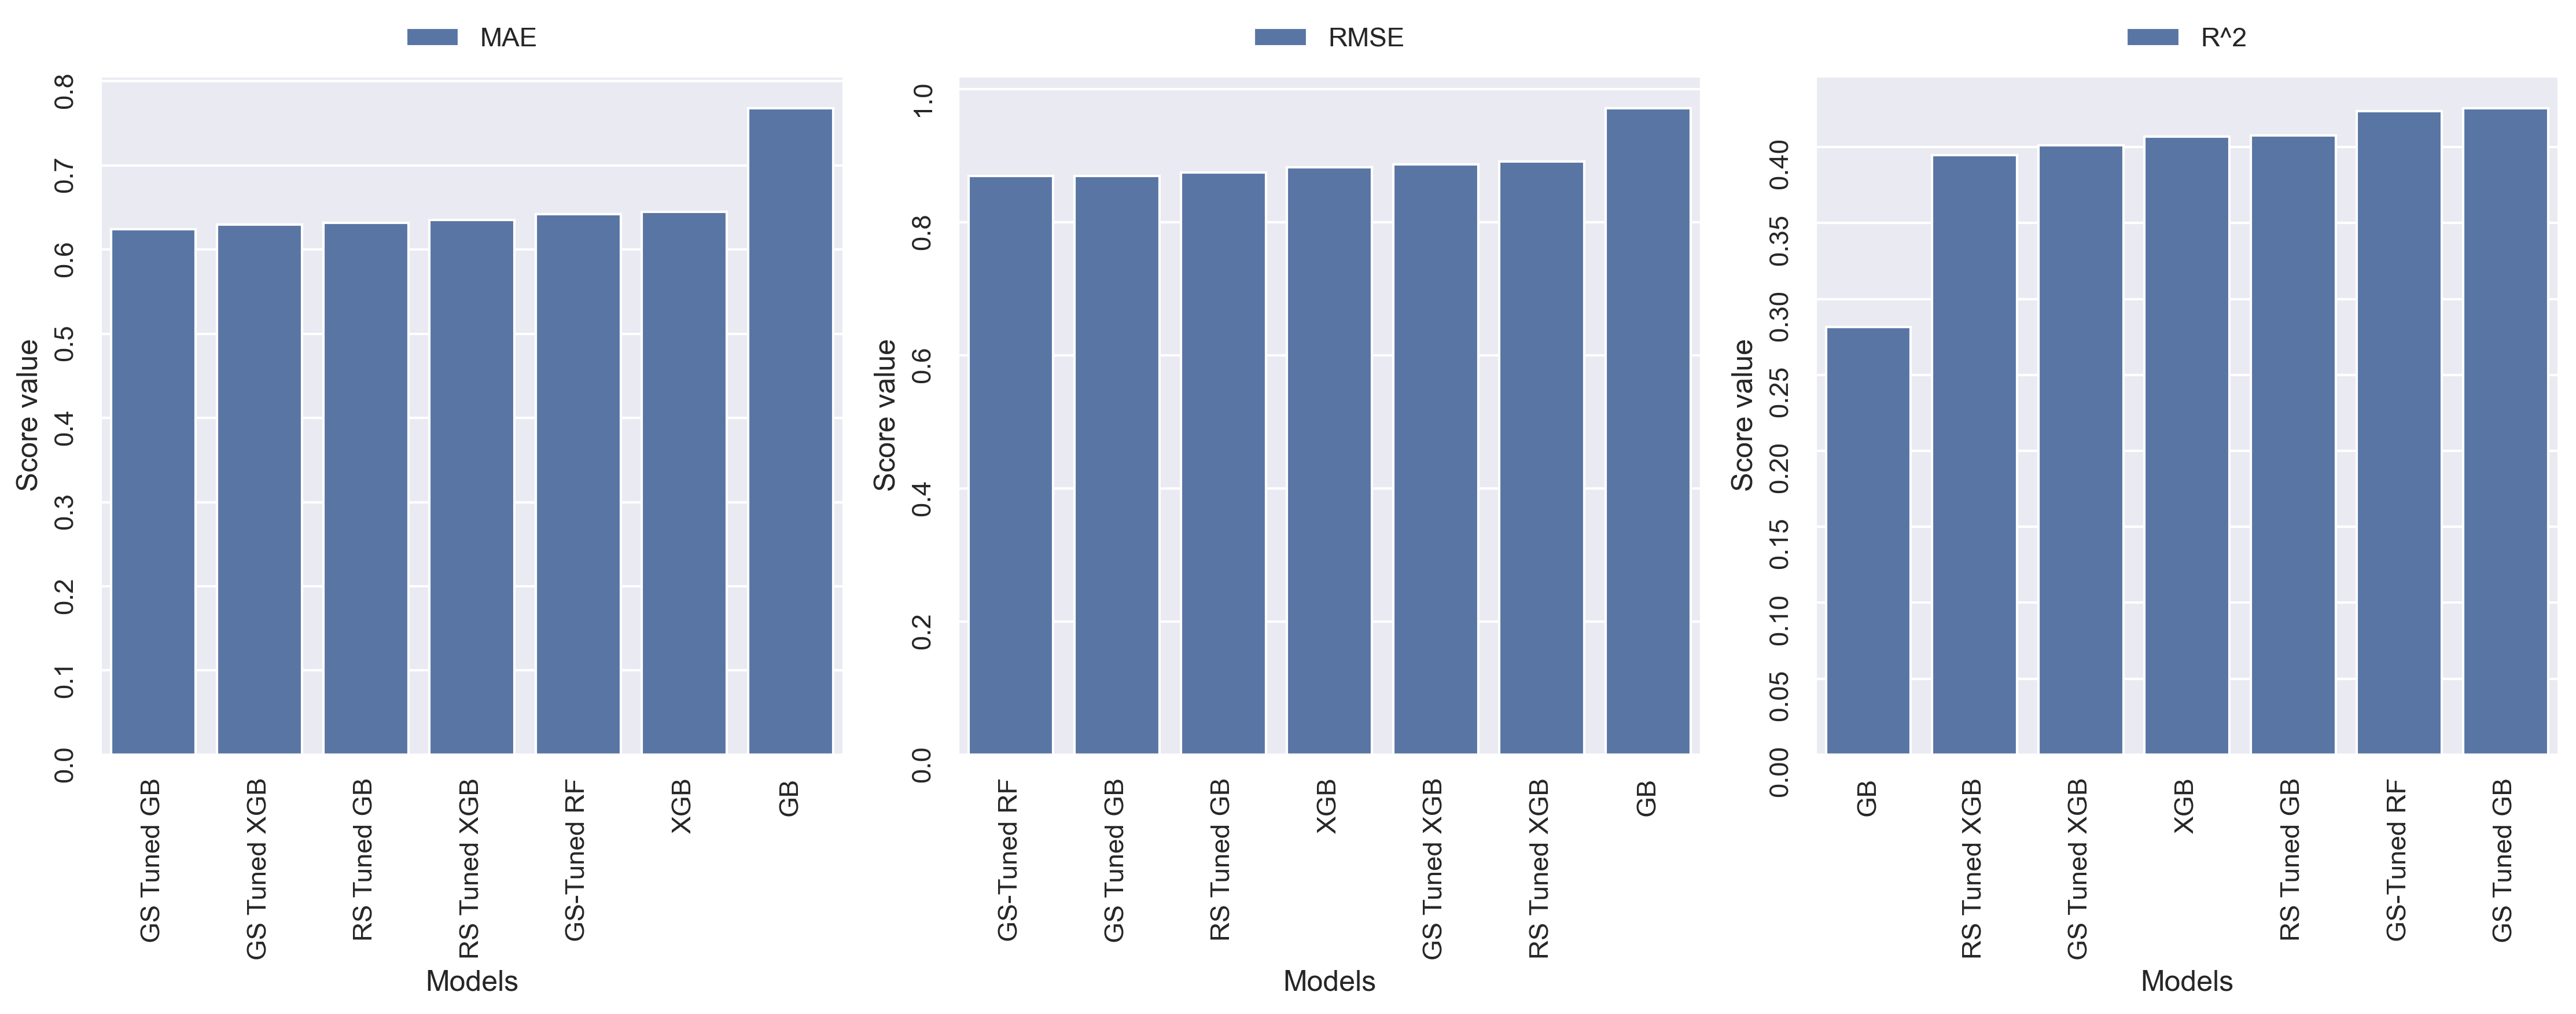

In [ ]:
# visualising our cross-validated scores

plot_cross_val_scores(tuned_models_df)

#### Well, we do have a clear winner! The best model is the GridSearch-tuned GradientBoostingRegressor. It performed the best in all the scoring metrics. 

Let me also introduce an early-stopping to this GB model which might reduce the observed overfitting. 

In [10]:
# without early stopping 
# following the module

gb_NO_early_stopping = GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1)

pipe_nes = Pipeline(steps=[("preprocessor",preprocessor), ("model",gb_NO_early_stopping)])

pipe_nes.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Assay Type',
                                                   'Target Name']),
                                                 ('num', StandardScaler(),
                                                  ['MW', 'LogP', 'H_Donors',
                                                   'H_Acceptors', 'TPSA',
                                                   'Ring_Count',
                                                   'Rotatable_Bonds'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=11, max_features='log2',
                                           min_samples_split=8))])

In [11]:
# early stopping 
# following the module

gb_early_stopping = GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1,
    validation_fraction=0.1,
    n_iter_no_change=5,
    )

pipe_es = Pipeline(steps=[("preprocessor",preprocessor), ("model",gb_early_stopping)])

pipe_es.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Assay Type',
                                                   'Target Name']),
                                                 ('num', StandardScaler(),
                                                  ['MW', 'LogP', 'H_Donors',
                                                   'H_Acceptors', 'TPSA',
                                                   'Ring_Count',
                                                   'Rotatable_Bonds'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=11, max_features='log2',
                                           min_samples_split=8,
                                           n_iter_no_change=5))])

In [44]:
print("n-estimators without early stopping:", gb_NO_early_stopping.n_estimators_)
print("n-estimators with early stopping:", gb_early_stopping.n_estimators_)

n-estimators without early stopping: 100
n-estimators with early stopping: 34


In [73]:
# let us compare the results, whether overfitting issue is addressed or not

np.random.seed(101)
ES_models = { "GB NES": gb_NO_early_stopping,
             "GB ES": gb_early_stopping}

ES_models_Scores = []
ES_models_cv_Scores = []

for name, model in ES_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    ES_models_Scores.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))
    ES_models_cv_Scores.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

df_ES_models = pd.concat(ES_models_Scores)
#df_XGB_RF_models

cv_ES_models_CV = pd.concat(ES_models_cv_Scores)
cv_ES_models_CV.index.name='Models'
#tuned_models_df

In [76]:
df_ES_models

Train MAE  Train RMSE  Train R-squared  Validation MAE  \
Models                                                           
GB NES   0.282178    0.456896         0.838019        0.602160   
GB ES    0.419273    0.584357         0.735037        0.700977   

        Validation RMSE  Validation R-squared  
Models                                         
GB NES         0.861054              0.521692  
GB ES          0.964131              0.400321

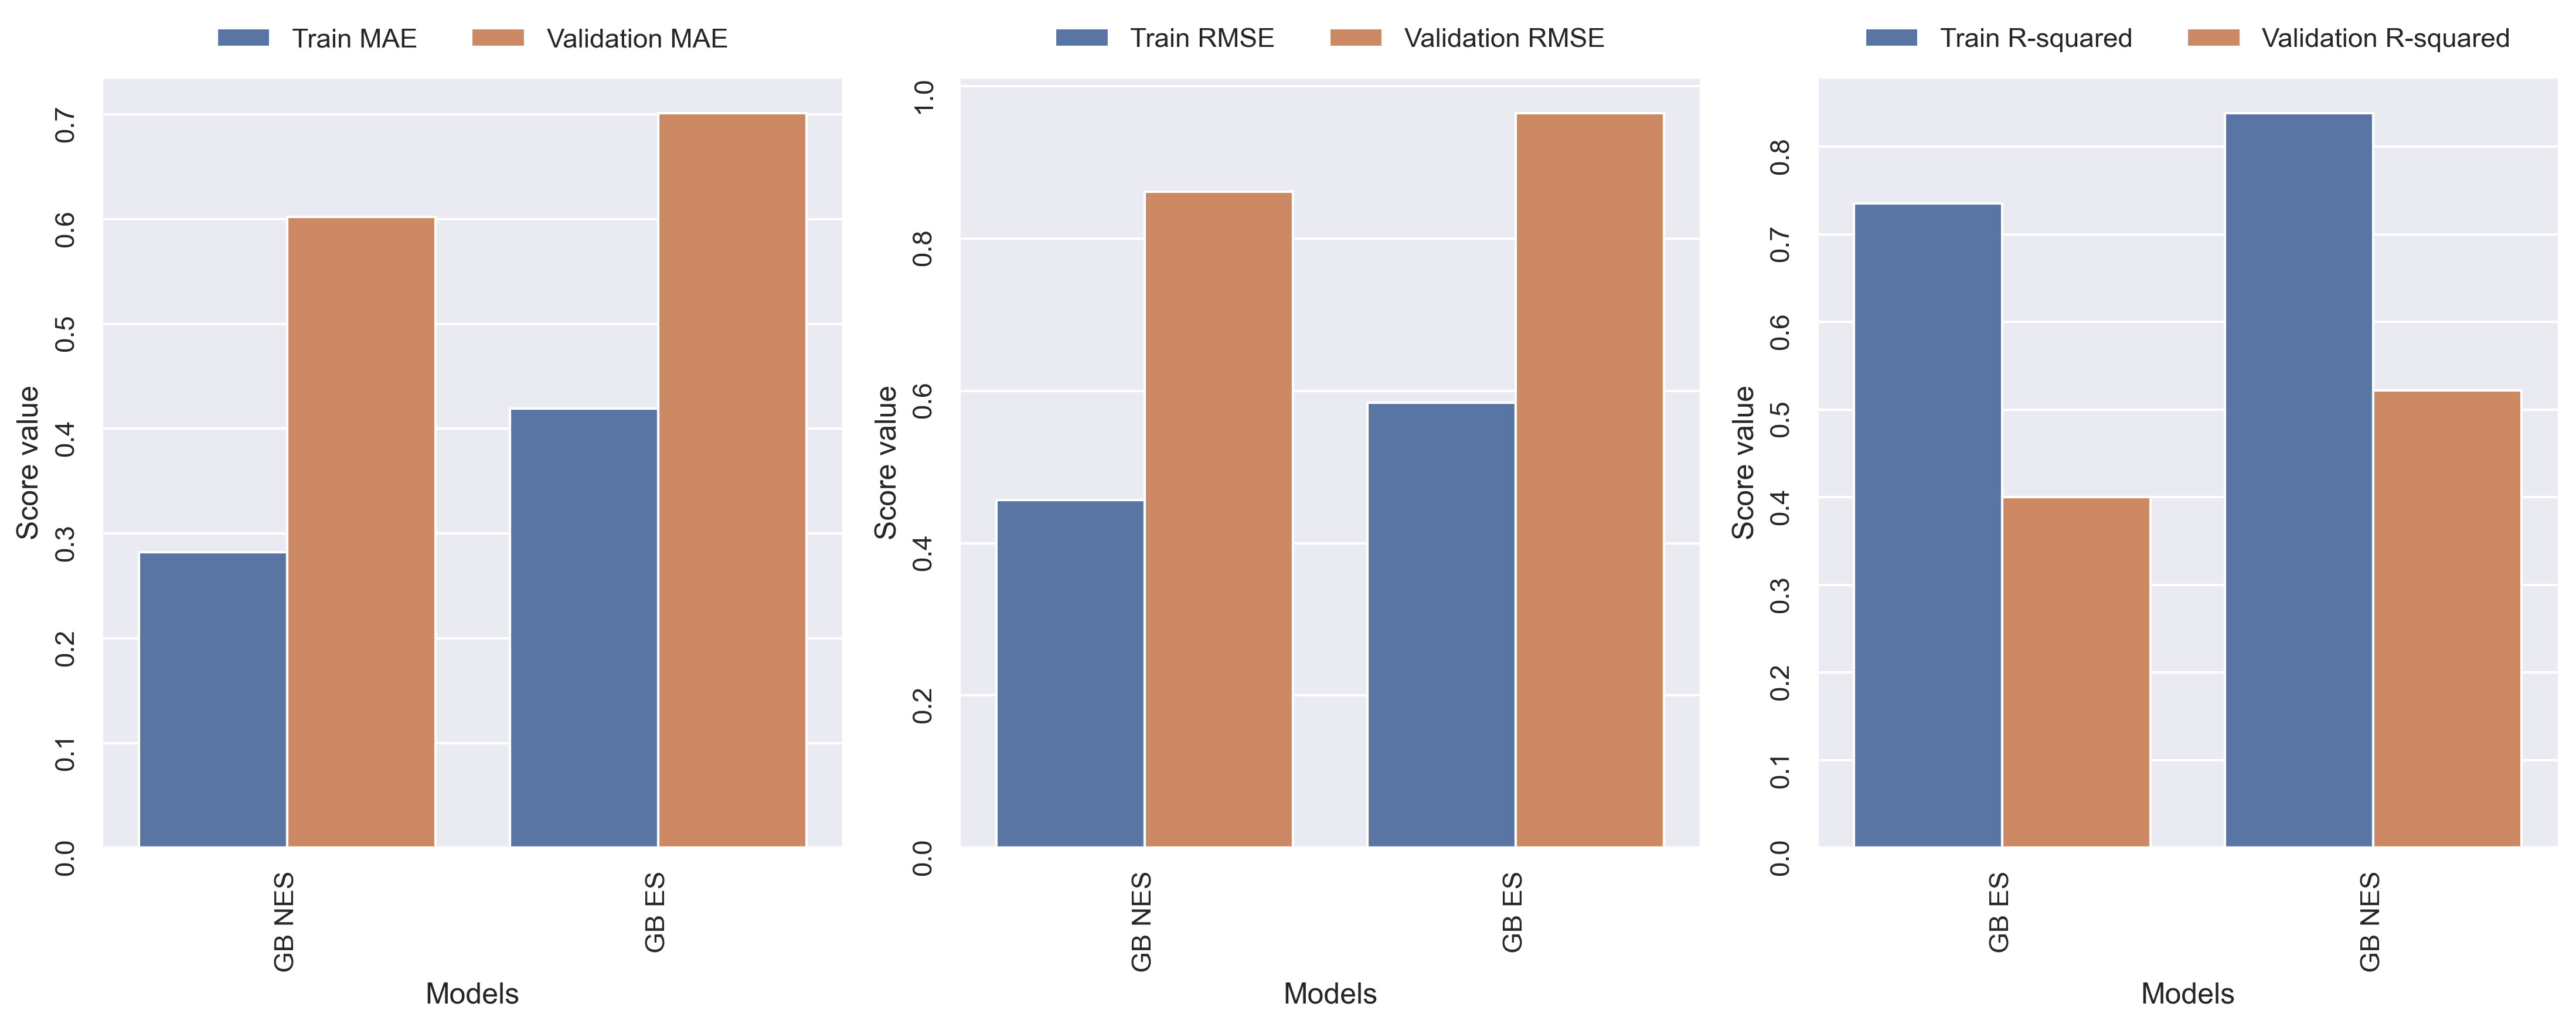

In [77]:
plot_train_val_scores(df_ES_models)

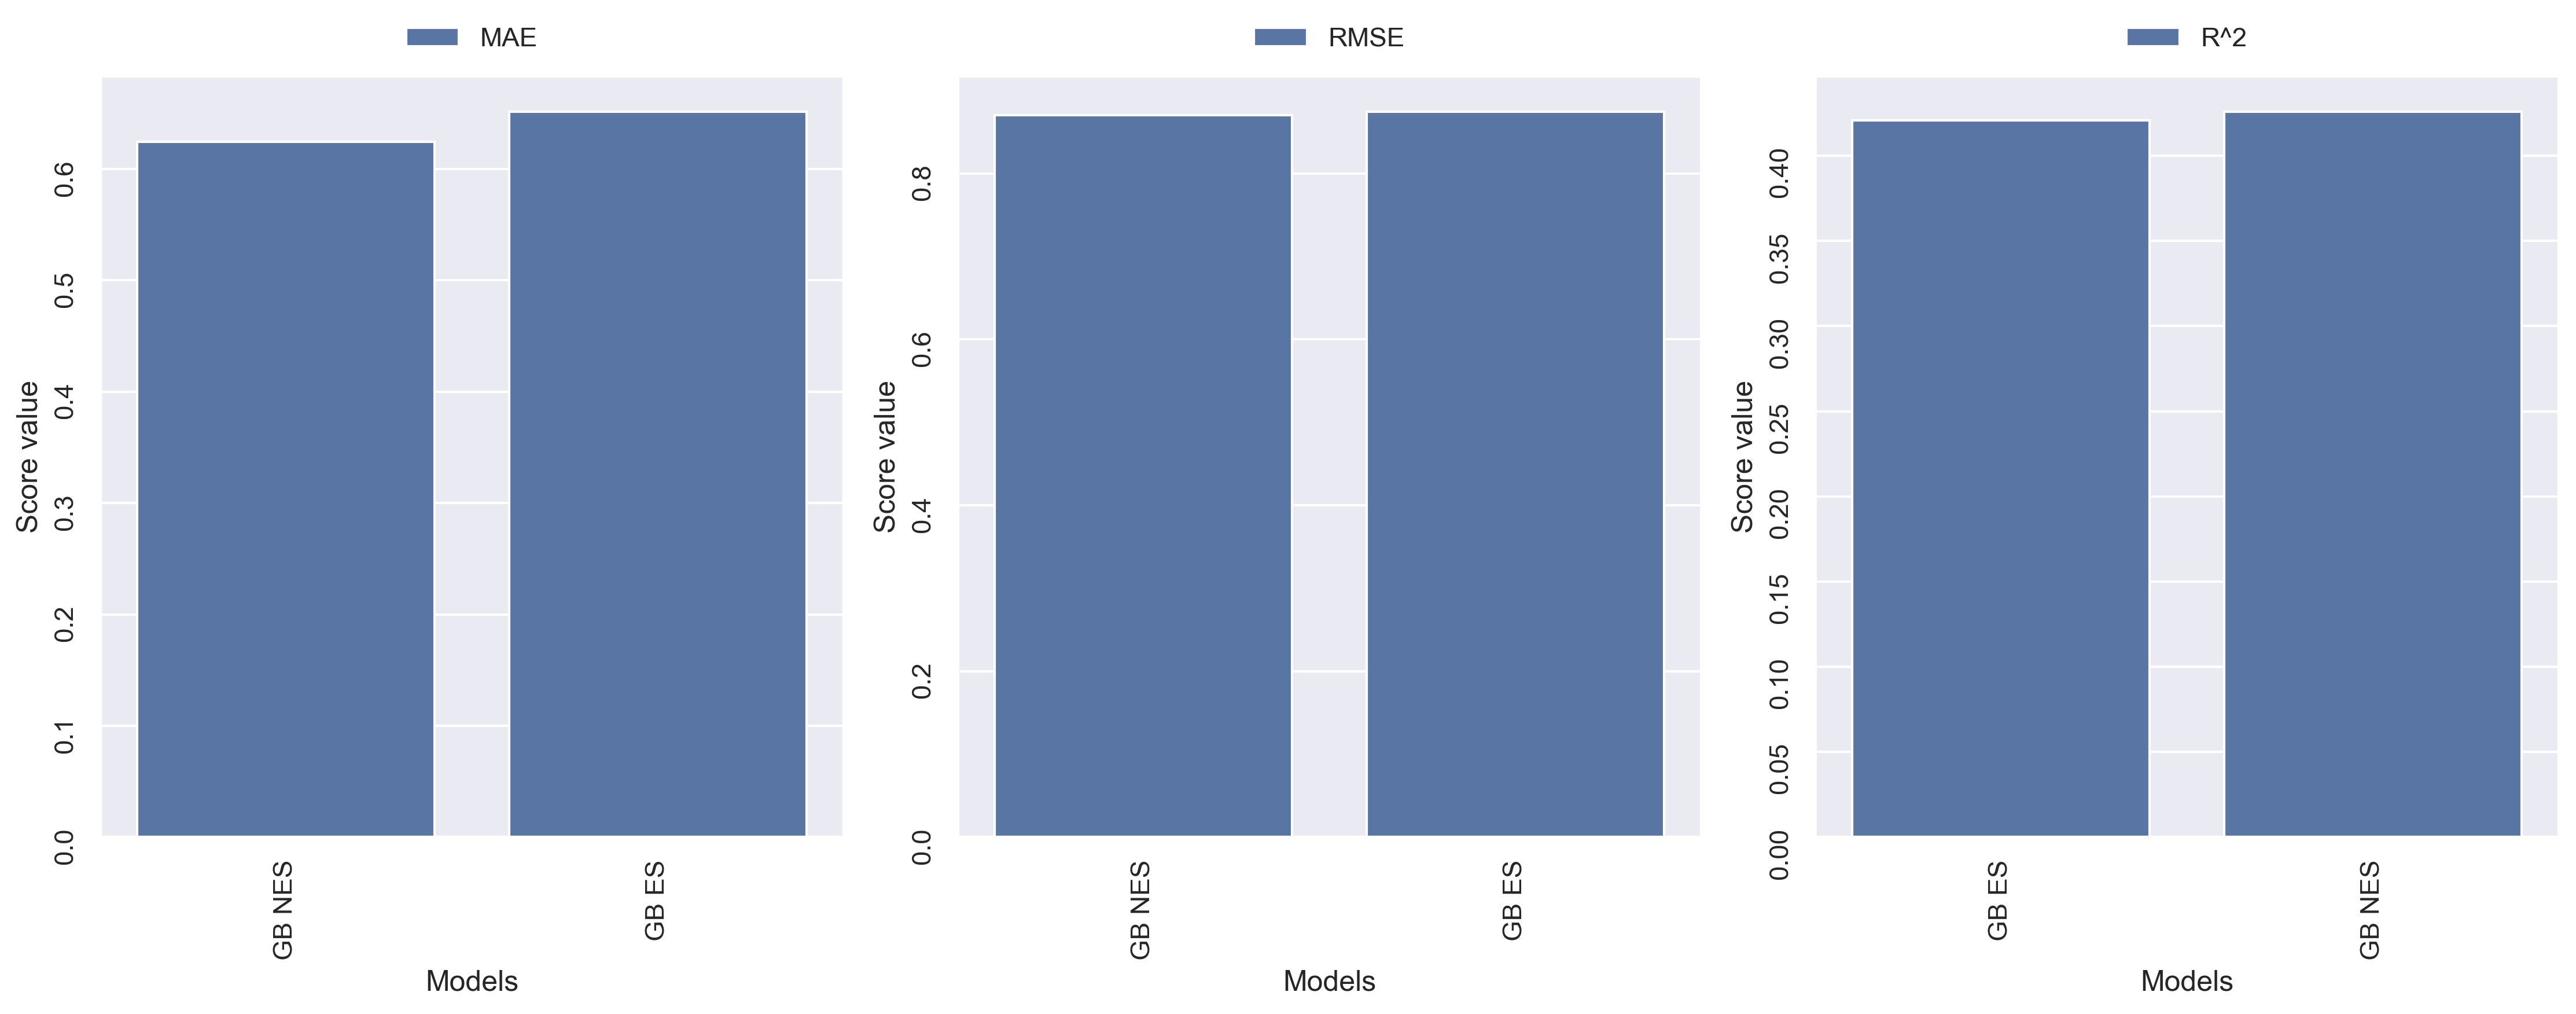

In [78]:
plot_cross_val_scores(cv_ES_models_CV)

In [ ]:
# Another alternative way to analyse the influence of early stopping is by following the documentation available online where
# the scores are plotted with respect to boosting iterations
# storing my predictionsv 

train_pred_nes = pipe_nes.predict(X_train)
val_pred_nes = pipe_nes.predict(X_val)
train_pred_es = pipe_es.predict(X_train)
val_pred_es = pipe_es.predict(X_val)


In [12]:
# i will be using .staged_predict later on that's why i need to use the transformed train and val sets of X.

X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

In [ ]:
# storing the results before I plot them

train_errors_nes = []
val_errors_nes = []

train_errors_es = []
val_errors_es = []

for i, (train_pred, val_pred) in enumerate(
    zip(
        gb_NO_early_stopping.staged_predict(X_train_transformed),
        gb_NO_early_stopping.staged_predict(X_val_transformed),
    )
):
    train_errors_nes.append(mean_squared_error(y_train, train_pred))
    val_errors_nes.append(mean_squared_error(y_val, val_pred))

for i, (train_pred, val_pred) in enumerate(
    zip(
        gb_early_stopping.staged_predict(X_train_transformed),
        gb_early_stopping.staged_predict(X_val_transformed),
    )
):
    train_errors_es.append(mean_squared_error(y_train, train_pred))
    val_errors_es.append(mean_squared_error(y_val, val_pred))

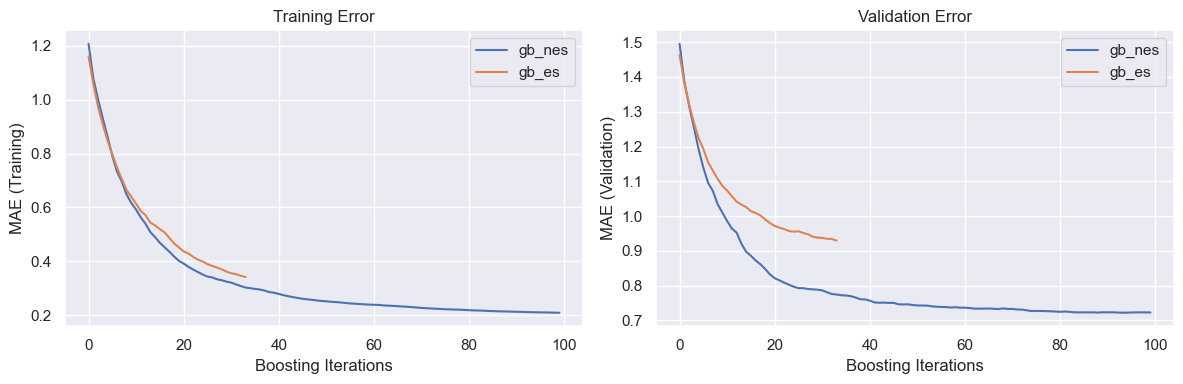

In [72]:
# plotting the results

fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].plot(train_errors_nes, label="gb_nes")
axes[0].plot(train_errors_es, label="gb_es")
axes[0].set_xlabel("Boosting Iterations")
axes[0].set_ylabel("MAE (Training)")
#axes[0].set_yscale("log")
axes[0].legend()
axes[0].set_title("Training Error")

axes[1].plot(val_errors_nes, label="gb_nes")
axes[1].plot(val_errors_es, label="gb_es")
axes[1].set_xlabel("Boosting Iterations")
axes[1].set_ylabel("MAE (Validation)")
#axes[1].set_yscale("log")
axes[1].legend()
axes[1].set_title("Validation Error")

#training_times = [training_time_full, training_time_early_stopping]
#labels = ["gb_nes", "gb_es"]
#bars = axes[2].bar(labels, training_times)
#axes[2].set_ylabel("Training Time (s)")

#for bar, n_estimators in zip(bars, [n_estimators_full, estimators_early_stopping]):
#    height = bar.get_height()
#    axes[2].text(
#        bar.get_x() + bar.get_width() / 2,
#        height + 0.001,
#        f"Estimators: {n_estimators}",
#        ha="center",
#        va="bottom",
#    )

plt.tight_layout()
plt.show()

Well, the overfitting is not addressed to a substancial level and the score becomes slightly poor. It is observed from:
1. Our bar plots that compare the train and validation sets.
2. Scores vs boosting iterations plots.

So, it is better that we don't go for an early stopping model.

### Our best performing model is the GS-tuned GBRegressor.


In [23]:
# getting feature importances 

coef_df = pd.DataFrame({'Feature Importances':gb_NO_early_stopping.feature_importances_},index=preprocessor.get_feature_names_out())
coef_df = coef_df.sort_values('Feature Importances',ascending=False)
coef_df

Feature Importances
num__LogP                        0.189133
num__MW                          0.163397
num__TPSA                        0.157506
num__Rotatable_Bonds             0.105650
num__H_Donors                    0.080935
num__H_Acceptors                 0.074158
num__Ring_Count                  0.066188
cat__Assay Type_B                0.031990
cat__Target Name_D3              0.031560
cat__Assay Type_A                0.027127
cat__Target Name_D2              0.023541
cat__Assay Type_F                0.022440
cat__Target Name_D1              0.015394
cat__Target Name_D4              0.008192
cat__Target Name_D5              0.002789

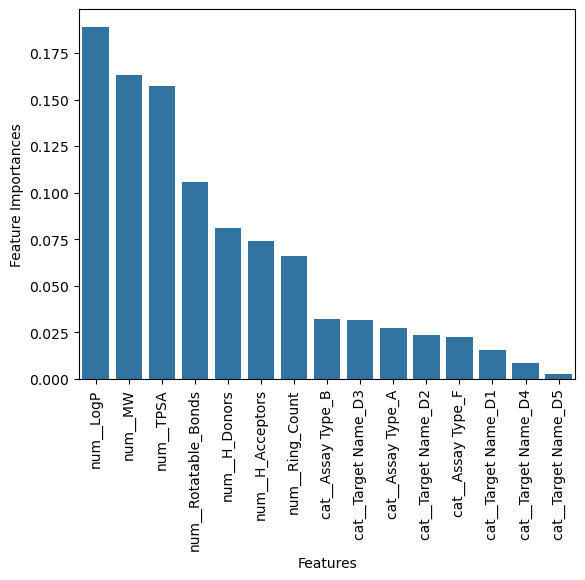

In [24]:
sns.barplot(data=coef_df,x=coef_df.index,y='Feature Importances');
plt.xticks(rotation=90);
plt.xlabel('Features');
plt.show()

The important features for this model are: 
* LogP
* MW
* TPSA
* Number of rotatable bonds

Finally, let's visualise and compare all our models together.

In [79]:
# a comparison of all models that I have tried and worked on in this project.

all_models = {"Ridge": Ridge(),
            "SVR_linear": SVR(kernel="linear"),
            "SVR_rbf": SVR(kernel="rbf"),
            "RF": RandomForestRegressor(),
            "Tuned SVR_rbf": SVR(kernel='rbf', gamma='scale', C=21.54434690031882),
            "RS-Tuned RF": RandomForestRegressor(n_estimators=500, min_samples_split=6),
            "GS-Tuned RF": RandomForestRegressor(n_estimators=490, min_samples_split=2),
            'ab':AdaBoostRegressor(), 
            'gb': GradientBoostingRegressor(),
            "RS Tuned GB": GradientBoostingRegressor(min_samples_split=6, max_features='log2', max_depth=9, learning_rate=0.15000000000000002),
             "GS Tuned GB": GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1),
             "XGB": XGBRegressor(),
             "RS Tuned XGB": XGBRegressor(min_child_weight=0, max_depth=9, learning_rate=0.16),
             "GS Tuned XGB": XGBRegressor(min_child_weight=2, max_depth=11, learning_rate=0.14200000000000002)}

ALL_model_scores = []
ALL_models_cv_Scores = []

for name, model in all_models.items():
    pipe = Pipeline(steps=[("preprocessor",preprocessor), ("model",model)])
    ALL_model_scores.append(fit_and_score(name, pipe, X_train,X_val,y_train,y_val))
    ALL_models_cv_Scores.append(model_cross_val_scores(pipe,name, X_prac,y_prac))

df_ALL_models = pd.concat(ALL_model_scores)
#df_XGB_RF_models

df_ALL_models_CV = pd.concat(ALL_models_cv_Scores)
df_ALL_models_CV.index.name='Models'
#tuned_models_df

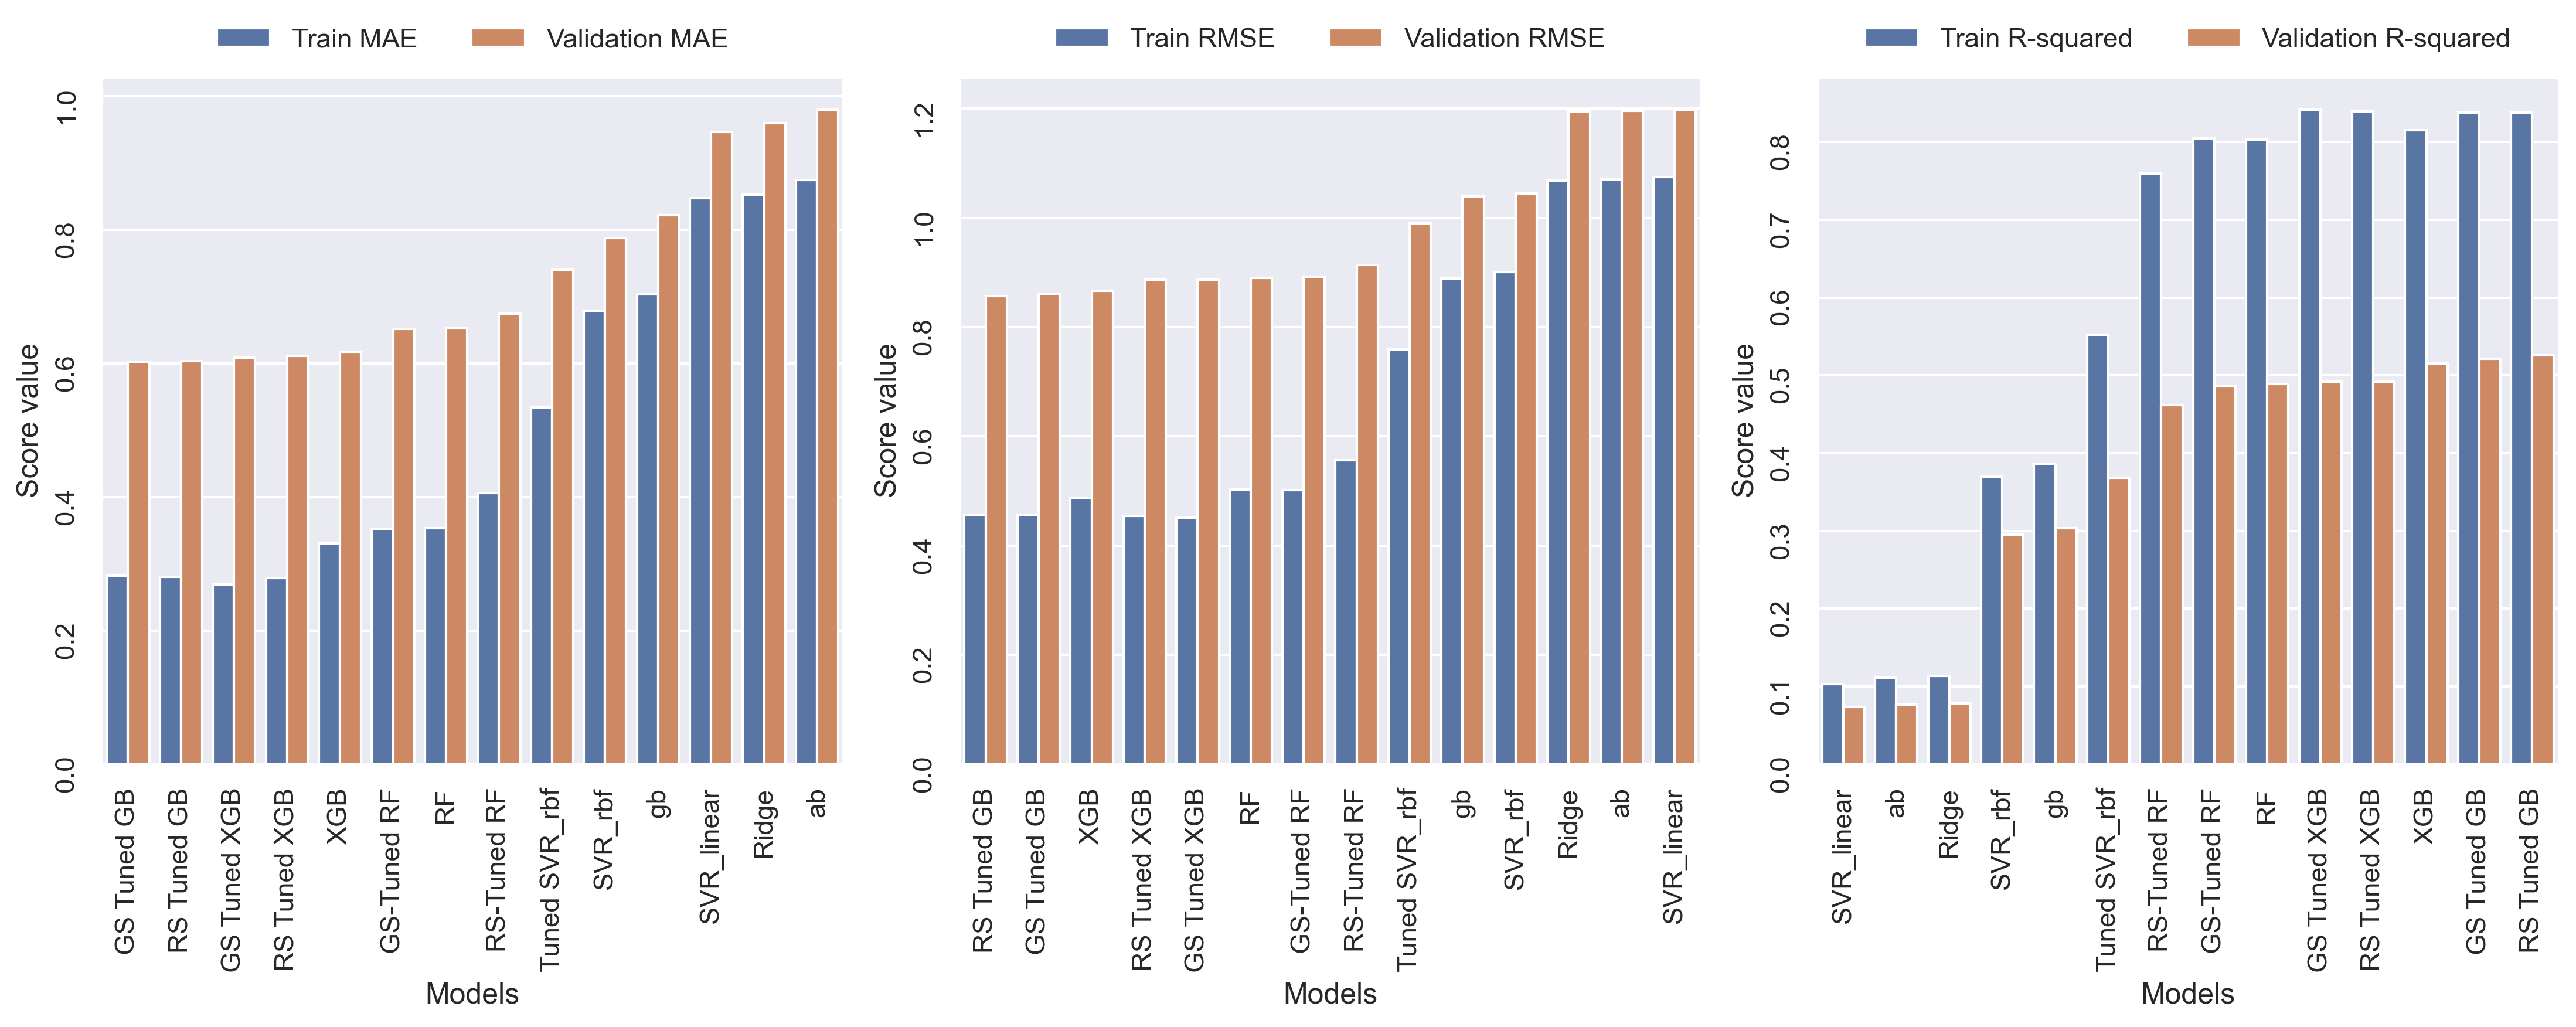

In [80]:
plot_train_val_scores(df_ALL_models)

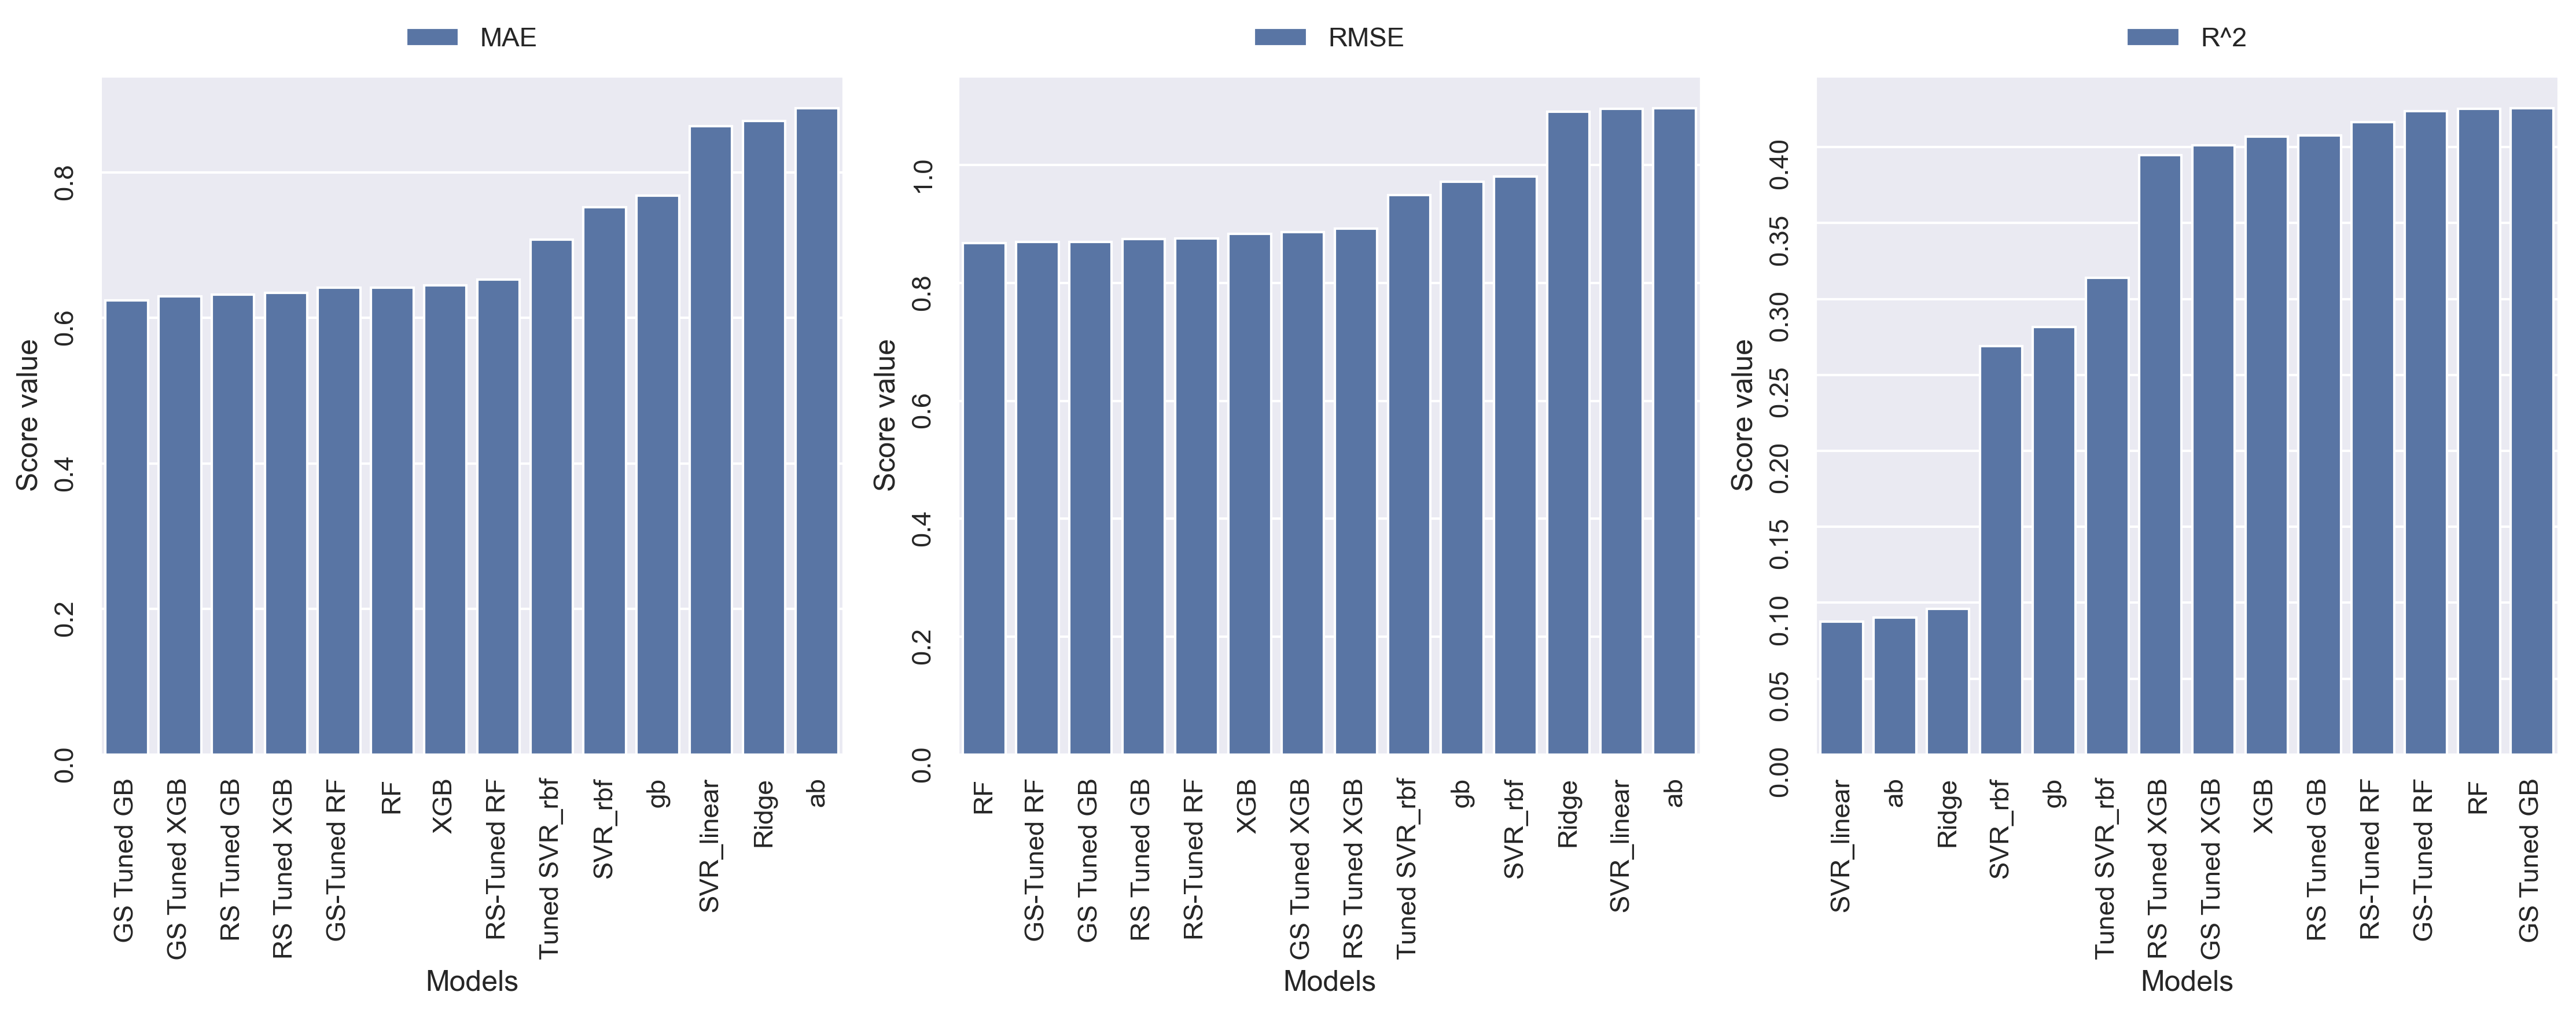

In [92]:
plot_cross_val_scores(df_ALL_models_CV)

### Key observations from our analysis:

1. **The top models**: The GS-tuned and RS-tuned GB models have the best values of the validation scores, making them a good choice for our final model.
2. **GS-tuned GB model**: From the cross-validated scores, the GS-tuned GB model performs better in determining both MAE (~0.63) and R^2 (~0.4) value, compared to the RS-tuned model. Since our main focus was always the MAE, the optimal choice is the GS-tuned GB model.
3. **Overfitting**: However, we observe significant overfitting of the model during training. Despite trying to tune the hyperparameters and introducing early stopping, this overfitting could not be resolved. 
4. **Competitive results**: Regardless, our scores are within competitive range when compared with exisiting studies on drug-target interactions. 
5. **Future work**: To improve our score further and address the observed overfitting, it is desirable that to move onto more advanced techniques. The target of the next project is to explore this problem using deep learning techniques using neural networks.

### FINAL VERDICT: The best-performing model in this project is found to be a GridSearchCV-tuned GradientBoostRegressor with the tuned hyperparameters: `min_samples_split=8`, `max_features='log2'`, `max_depth=11`. 


## 5. Preparing to deploy the model.

**Note:** Our input data must be enriched with the molecular descriptors beforehand. 

In [1]:
# necessary imports 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline 

In [2]:
# the original data 
df = pd.read_csv('dopamine_pEC50.csv')

# Renaming Target Name column values to shorter names. 
df['Target Name'] = df['Target Name'].replace({'Dopamine D1 receptor':'D1','Dopamine D2 receptor':'D2',
                                              'Dopamine D3 receptor':'D3','Dopamine D4 receptor':'D4', 'Dopamine D5 receptor':'D5'})

# i also removed rows with pEC50 = 4.0 and 5.0 exactly
df = df[(df['pEC50']!=5.0) & (df['pEC50']!=4.0)]
df = df.reset_index().drop('index',axis=1)

# X and y split 
X = df.drop('pEC50',axis=1)
y = df['pEC50']

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Assay Type       2860 non-null   object 
 1   Target Name      2860 non-null   object 
 2   pEC50            2860 non-null   float64
 3   MW               2860 non-null   float64
 4   LogP             2860 non-null   float64
 5   H_Donors         2860 non-null   float64
 6   H_Acceptors      2860 non-null   float64
 7   TPSA             2860 non-null   float64
 8   Ring_Count       2860 non-null   float64
 9   Rotatable_Bonds  2860 non-null   float64
dtypes: float64(8), object(2)
memory usage: 223.6+ KB


In [6]:
from sklearn.model_selection import train_test_split

np.random.seed(101)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_val, X_hold, y_val, y_hold = train_test_split(X_test, y_test, test_size=0.5, random_state=101)

X_combine = [X_train, X_val]
y_combine = [y_train, y_val]

X_prac = pd.concat(X_combine)
y_prac = pd.concat(y_combine)

In [7]:
X_train.columns

Index(['Assay Type', 'Target Name', 'MW', 'LogP', 'H_Donors', 'H_Acceptors',
       'TPSA', 'Ring_Count', 'Rotatable_Bonds'],
      dtype='object')

Defining our preprocessor.

In [9]:
# cat feats = ['Assay Type', 'Target Name']
# num feats = ['pEC50', 'MW', 'LogP', 'H_Donors','H_Acceptors', 'TPSA', 'Ring_Count', 'Rotatable_Bonds']

from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline

np.random.seed(101)

# categorical features 
cat_feat = ['Assay Type', 'Target Name']
cat_transformer = OneHotEncoder().set_output(transform="default")

# numerical features
num_feat = ['MW', 'LogP', 'H_Donors','H_Acceptors', 'TPSA', 'Ring_Count', 'Rotatable_Bonds']
num_transformer = StandardScaler()

# the column transformer
preprocessor = ColumnTransformer(transformers=[ ("cat",cat_transformer,cat_feat),
                                               ("num",num_transformer,num_feat)])

# our final model 
final_gb = GradientBoostingRegressor(min_samples_split=8, max_features='log2', max_depth=11, learning_rate=0.1)
final_model = Pipeline([("preprocessor", preprocessor), ("model",final_gb)])



In [10]:
final_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Assay Type',
                                                   'Target Name']),
                                                 ('num', StandardScaler(),
                                                  ['MW', 'LogP', 'H_Donors',
                                                   'H_Acceptors', 'TPSA',
                                                   'Ring_Count',
                                                   'Rotatable_Bonds'])])),
                ('model',
                 GradientBoostingRegressor(max_depth=11, max_features='log2',
                                           min_samples_split=8))])

In [18]:
y_val_preds = final_model.predict(X_val)

In [19]:
# final test before deploying
# the R^2 score should be 0.521692
# MAE should be 0.602160
from sklearn.metrics import mean_absolute_error

print("R-squared =",final_model.score(X_val,y_val))
print("MAE=", mean_absolute_error(y_val_preds,y_val))


R-squared = 0.5216922950304441
MAE= 0.6021596883982379


Yayy!! We can be sure now and begin with the deployment. Eveything works!!

In [21]:
# let's also calculate the score of the hold-out test set so that we can cross-check after we load our model later
y_hold_preds = final_model.predict(X_hold)

print("R-squared =",final_model.score(X_hold,y_hold))
print("MAE=", mean_absolute_error(y_hold_preds,y_hold))

R-squared = 0.3728485685671443
MAE= 0.6298732004837511


In [25]:
# using joblib to dump our model
import joblib 
joblib.dump(final_model,'train_pec50_model.pkl')

['train_pec50_model.pkl']

In [29]:
# loading our model to check if it works or not.
import joblib

loaded_model = joblib.load('train_pec50_model.pkl')

loaded_val_preds = loaded_model.predict(X_val)
loaded_hold_preds = loaded_model.predict(X_hold)

print("Val R-squared =",final_model.score(X_val,y_val))
print("Val MAE=", mean_absolute_error(loaded_val_preds,y_val))

print("Hold-out R-squared =",final_model.score(X_hold,y_hold))
print("Hold-out MAE=", mean_absolute_error(loaded_hold_preds,y_hold))

Val R-squared = 0.8701029492103355
Val MAE= 0.6021596883982379
Hold-out R-squared = 0.7852555351908461
Hold-out MAE= 0.6298732004837511


Yayy!! our model works. I am getting the same scores!! 

Now I will dump a final version of the model which is trained on the entire X, y set - to get more generalised results.

In [28]:
# fitting on entire dataset now 

final_model.fit(X,y)

# using joblib to dump our model
import joblib 
joblib.dump(final_model,'final_pec50_predict_model.pkl')

['final_pec50_predict_model.pkl']

In [ ]:
# loading our model and checking the results using our hold-out test set (just to be sure that our model works)
# i have to keep in mind that these results will be different than obtained before since the model trained on the entire X and y, 
# which already includes the X_hold and y_hold data

loaded_final_model = joblib.load('final_pec50_predict_model.pkl')

loaded_final_hold_preds = loaded_final_model.predict(X_hold)

print("Hold-out R-squared =",final_model.score(X_hold,y_hold))
print("Hold-out MAE=", mean_absolute_error(loaded_final_hold_preds,y_hold))

Hold-out R-squared = 0.7852555351908461
Hold-out MAE= 0.3145793593693997


#### Well, the score looks impressive but it should be kept in mind that the hold-out set was a part of training dataset. Further, the ranges of these scores match the ones we've been obtaining for the training dataset.
#### The main purpose of determining these scores was to ensure our model works.
#### The score/prediction of an entirely new dataset may show a MAE ~0.6 as we have been observing before.

### **Future work**:
#### Before ending this project here, let us finally mention about the future direction of this project, which was discussed before as well. To improve our score further and address the observed overfitting, it is desirable that to move onto more advanced techniques. The target of the next project is to explore this problem using deep learning techniques using neural networks.